## Load dataset

In [1]:
!pip install sdv

In [2]:
import os
import shutil
os.makedirs(os.path.expanduser('~/.kaggle'), exist_ok=True)
shutil.copy('./kaggle_.json', os.path.expanduser('~/.kaggle/kaggle.json'))

os.chmod(os.path.expanduser('~/.kaggle/kaggle.json'), 0o600)

In [3]:
!kaggle datasets download -d johnsmith88/heart-disease-dataset -p ./heart_data
!unzip -o ./heart_data/heart-disease-dataset.zip -d ./heart_data

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
heart-disease-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  ./heart_data/heart-disease-dataset.zip
  inflating: ./heart_data/heart.csv  


## data per-processing

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix

import matplotlib.pyplot as plt

from IPython.display import display
from PIL import Image
import io

In [5]:
df = pd.read_csv('/content/heart_data/heart.csv')

In [6]:
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  target  
0         2   2     3       0  
1         0   0     3       0  
2         0   0     3       0  
3         2   1     3       0  
4         1   3     2       0  
...     ...  ..   ...     ...  
1020      2   0     2       1  
1021      1   1     3       0  
1022      1   1     2       0  
1023      2   0     2       1  
1024      1   1     3       0  

[1025 rows x 14 columns]

In [7]:
df.shape

(1025, 14)

Data balancing

In [8]:
unic_val = list(df['target'].unique())
unic_val

[0, 1]

In [9]:
n_data_class = {k: len(df[df["target"] == k]) for k in unic_val}
n_data_class

{0: 499, 1: 526}

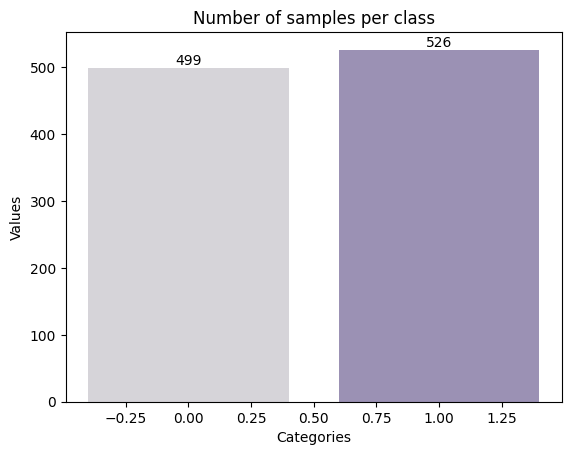

In [10]:
value = n_data_class.values()
key = n_data_class.keys()
coloring = ['#C5C3CA', '#716294']

bars = plt.bar(key, value, color=coloring, alpha=0.7)

for bar, val in zip(bars, value):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(val),
             ha='center', va='bottom', fontsize=10)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Number of samples per class')
plt.show()


Data destribution T-SNE

In [11]:
X = df.drop(columns=['target'])
y = df['target']

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


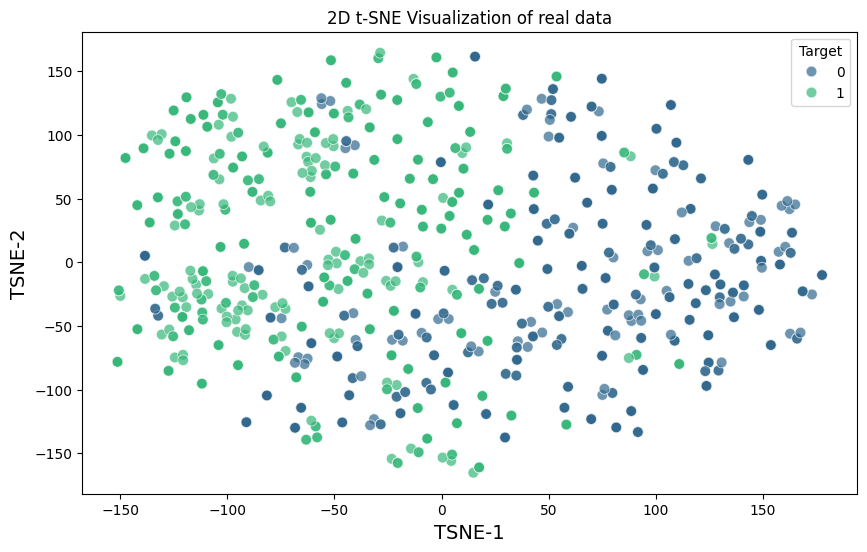

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2'])
tsne_df['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE-1', y='TSNE-2', hue='target', palette='viridis', s=60, alpha=0.7)
plt.title('2D t-SNE Visualization of real data', fontsize=12)
plt.xlabel('TSNE-1', fontsize=14)
plt.ylabel('TSNE-2', fontsize=14)
plt.legend(title='Target', loc='best')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


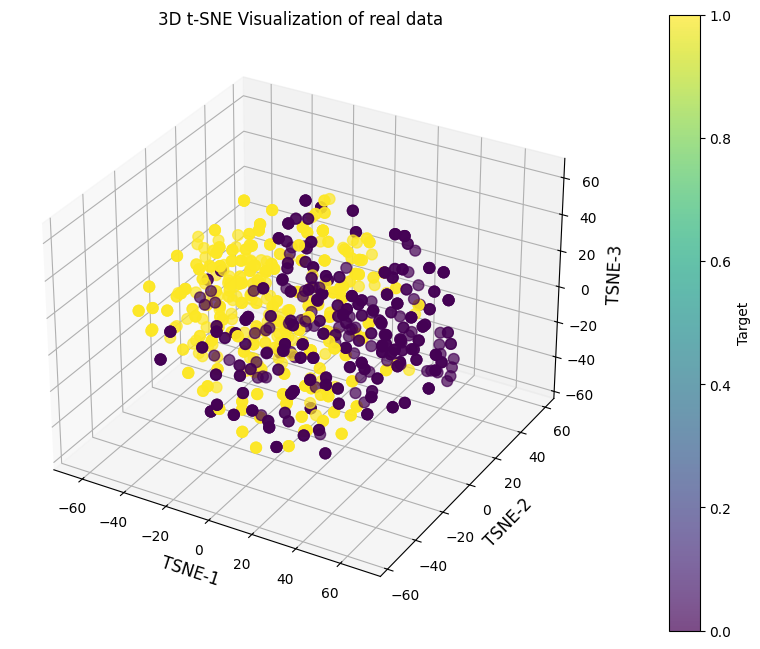

In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2', 'TSNE-3'])
tsne_df['target'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    tsne_df['TSNE-1'], tsne_df['TSNE-2'], tsne_df['TSNE-3'],
    c=tsne_df['target'], cmap='viridis', s=60, alpha=0.7
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Target')

ax.set_title('3D t-SNE Visualization of real data', fontsize=12)
ax.set_xlabel('TSNE-1', fontsize=12)
ax.set_ylabel('TSNE-2', fontsize=12)
ax.set_zlabel('TSNE-3', fontsize=12)

plt.show()

Data destribution PCA

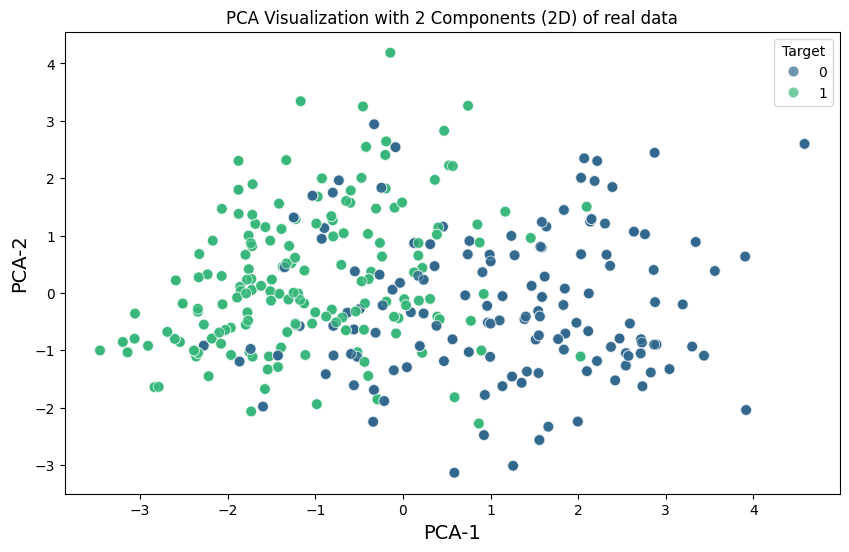

In [14]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA-1', 'PCA-2'])
pca_df['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA-1', y='PCA-2', hue='target', palette='viridis', s=60, alpha=0.7)
plt.title('PCA Visualization with 2 Components (2D) of real data', fontsize=12)
plt.xlabel('PCA-1', fontsize=14)
plt.ylabel('PCA-2', fontsize=14)
plt.legend(title='Target', loc='best')
plt.show()

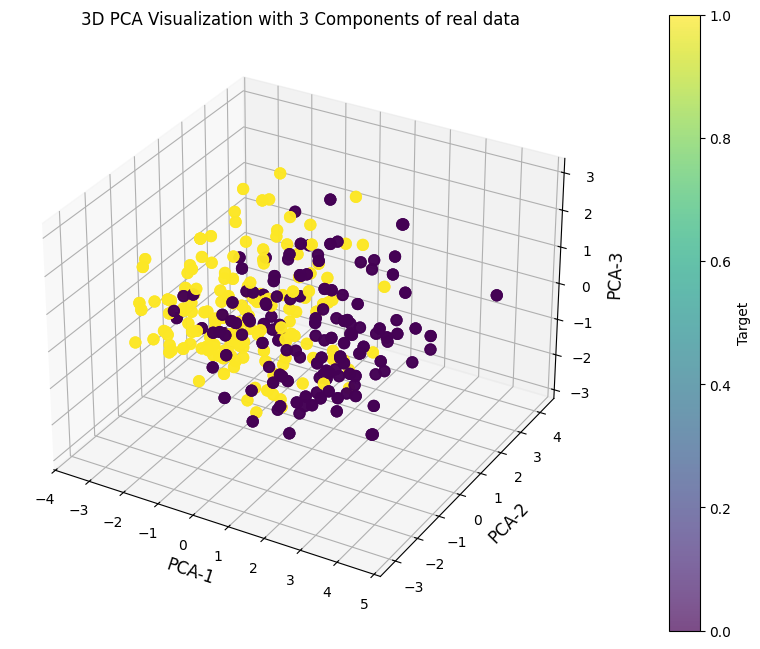

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA-1', 'PCA-2', 'PCA-3'])
pca_df['target'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df['PCA-1'], pca_df['PCA-2'], pca_df['PCA-3'],
    c=pca_df['target'], cmap='viridis', s=60, alpha=0.7
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Target')

ax.set_title('3D PCA Visualization with 3 Components of real data', fontsize=12)
ax.set_xlabel('PCA-1', fontsize=12)
ax.set_ylabel('PCA-2', fontsize=12)
ax.set_zlabel('PCA-3', fontsize=12)

plt.show()

In [16]:
# Split and save tables (test/train) to make shure that our data not leaked in Synthatic data generation

df_shuffled = df.sample(frac=1, random_state=42).reset_index(drop=True)

train_df, test_df = train_test_split(df_shuffled, test_size=0.25)

train_df.to_csv('train.csv', index=False)
test_df.to_csv('test.csv', index=False)

## Data spliting and pre-processing
train:25%, test:75%

In [17]:
df_train = pd.read_csv('/content/train.csv')
df_test = pd.read_csv('/content/test.csv')

In [18]:
scaler = MinMaxScaler()
df_scaled_train = scaler.fit_transform(df_train)
df_scaled_test = scaler.fit_transform(df_test)
df_scaled = pd.DataFrame(df_scaled_train, columns=df.columns)

In [19]:
df_scaled

age  sex        cp  trestbps      chol  fbs  restecg   thalach  \
0    0.541667  1.0  0.333333  0.339623  0.310502  0.0      0.5  0.641221   
1    0.291667  1.0  0.666667  0.339623  0.431507  0.0      0.5  0.694656   
2    0.333333  1.0  0.000000  0.452830  0.417808  0.0      0.0  0.580153   
3    0.625000  1.0  0.000000  0.716981  0.456621  0.0      0.0  0.526718   
4    0.625000  1.0  0.000000  0.150943  0.257991  0.0      0.0  0.541985   
..        ...  ...       ...       ...       ...  ...      ...       ...   
763  0.291667  0.0  0.000000  0.358491  0.490868  1.0      0.0  0.496183   
764  0.770833  1.0  0.000000  0.622642  0.232877  0.0      0.0  0.511450   
765  1.000000  1.0  0.000000  0.292453  0.406393  0.0      0.0  0.694656   
766  0.583333  1.0  0.000000  0.339623  0.011416  0.0      0.5  0.335878   
767  0.187500  1.0  0.666667  0.415094  0.111872  0.0      0.5  0.778626   

     exang   oldpeak  slope    ca      thal  target  
0      0.0  0.000000    1.0  0.00  0.666667     1.0  
1      0.0  0.306452    1.0  0.25  0.666667     1.0  
2      1.0  0.000000    0.5  0.75  1.000000     0.0  
3      1.0  0.548387    0.0  0.00  1.000000     0.0  
4      1.0  0.193548    0.5  0.25  1.000000     0.0  
..     ...       ...    ...   ...       ...     ...  
763    1.0  0.483871    0.5  0.00  1.000000     0.0  
764    0.0  0.370968    1.0  0.00  0.333333     1.0  
765    1.0  0.000000    1.0  0.75  0.666667     0.0  
766    1.0  0.193548    0.5  0.25  1.000000     0.0  
767    0.0  0.000000    1.0  1.00  0.666667     1.0  

[768 rows x 14 columns]

In [20]:
X_train = df_train.drop(columns=['target']).to_numpy()
y_train = df_train['target'].to_numpy()

X_test = df_test.drop(columns=['target']).to_numpy()
y_test = df_test['target'].to_numpy()

In [21]:
print("X_train: ", X_train.shape)
print("y_train: ",y_train.shape)
print("X_test: ",X_test.shape)
print("y_test:",y_test.shape)

X_train:  (768, 13)
y_train:  (768,)
X_test:  (257, 13)
y_test: (257,)


## Models

In [22]:
class ClassifierModel:
    def __init__(self, model_type='SVM'):
        self.model_type = model_type
        self.y_problem = False
        if model_type == 'SVM':
            self.model = SVC()
        elif model_type == 'KNN':
            self.y_problem = True
            self.model = KNeighborsClassifier()
        elif model_type == 'DecisionTree':
            self.model = DecisionTreeClassifier()
        elif model_type == 'RandomForest':
            self.model = RandomForestClassifier()
        elif model_type == 'LogisticRegression':
            self.model = LogisticRegression()
        elif model_type == 'GradientBoosting':
            self.model = GradientBoostingClassifier()
        elif model_type == 'AdaBoost':
            self.model = AdaBoostClassifier()
        elif model_type == 'ExtraTrees':
            self.model = ExtraTreesClassifier()
        elif model_type == 'RidgeClassifier':
            self.model = RidgeClassifier()
        elif model_type == 'NaiveBayes':
            self.model = GaussianNB()
        elif model_type == 'MultinomialNB':
            self.model = MultinomialNB()
        elif model_type == 'GaussianProcess':
            self.model = GaussianProcessClassifier()
        elif model_type == 'LDA':
            self.model = LinearDiscriminantAnalysis()
        elif model_type == 'QDA':
            self.model = QuadraticDiscriminantAnalysis()
        elif model_type == 'MLP':
            self.model = MLPClassifier()
        else:
            raise ValueError("Unsupported model type. Choose from: 'SVM', 'KNN', 'DecisionTree', 'RandomForest', 'LogisticRegression', 'GradientBoosting', 'AdaBoost', 'ExtraTrees', 'RidgeClassifier', 'NaiveBayes', 'MultinomialNB', 'GaussianProcess', 'LDA', 'QDA', 'MLP'.")

    def train(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X_test):
        return self.model.predict(X_test)

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)

        if hasattr(self.model, "predict_proba"):
            y_score = self.model.predict_proba(X_test)
            if y_score.ndim == 2 and y_score.shape[1] == 2:
                y_score = y_score[:, 1]
            roc_auc = roc_auc_score(y_test, y_score, multi_class='ovr')
        else:
            roc_auc = None

        return {
            "model": self.model_type,
            'accuracy': accuracy_score(y_test, y_pred),
            'f1_score': f1_score(y_test, y_pred, average='weighted'),
            'precision': precision_score(y_test, y_pred, average='weighted'),
            'recall': recall_score(y_test, y_pred, average='weighted'),
            'confusion_matrix': confusion_matrix(y_test, y_pred)
        }

In [23]:
list_models = ['SVM', 'DecisionTree', 'RandomForest', 'LogisticRegression', 'GradientBoosting', 'AdaBoost', 'ExtraTrees', 'RidgeClassifier', 'NaiveBayes', 'GaussianProcess', 'LDA', 'QDA', 'MLP']

In [24]:
def eval_moduls(X_train, y_train, X_test, y_test, models):
  output = {}
  for item in models:
    print(item)
    model = ClassifierModel(item)
    model.train(X_train, y_train)
    model_eval = model.evaluate(X_test, y_test)
    output[item] = model_eval
    output[item]["model"] = model
    print(model_eval)
    print("---"*30+">")
  return output


In [25]:
train_models = eval_moduls(X_train, y_train, X_test, y_test, list_models)

SVM
{'model': <__main__.ClassifierModel object at 0x78a5c4cbb3d0>, 'accuracy': 0.7003891050583657, 'f1_score': 0.7011614268849298, 'precision': 0.7080662657705459, 'recall': 0.7003891050583657, 'confusion_matrix': array([[85, 30],
       [47, 95]])}
------------------------------------------------------------------------------------------>
DecisionTree
{'model': <__main__.ClassifierModel object at 0x78a5c4cc5290>, 'accuracy': 0.9883268482490273, 'f1_score': 0.9883396850966755, 'precision': 0.9886236232935436, 'recall': 0.9883268482490273, 'confusion_matrix': array([[115,   0],
       [  3, 139]])}
------------------------------------------------------------------------------------------>
RandomForest
{'model': <__main__.ClassifierModel object at 0x78a5c4953b90>, 'accuracy': 0.9883268482490273, 'f1_score': 0.9883396850966755, 'precision': 0.9886236232935436, 'recall': 0.9883268482490273, 'confusion_matrix': array([[115,   0],
       [  3, 139]])}
----------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'model': <__main__.ClassifierModel object at 0x78a5c49b4f90>, 'accuracy': 0.9377431906614786, 'f1_score': 0.9377431906614786, 'precision': 0.9377431906614786, 'recall': 0.9377431906614786, 'confusion_matrix': array([[107,   8],
       [  8, 134]])}
------------------------------------------------------------------------------------------>
AdaBoost
{'model': <__main__.ClassifierModel object at 0x78a5c4918190>, 'accuracy': 0.8715953307392996, 'f1_score': 0.8711243968745677, 'precision': 0.8719727810227378, 'recall': 0.8715953307392996, 'confusion_matrix': array([[ 95,  20],
       [ 13, 129]])}
------------------------------------------------------------------------------------------>
ExtraTrees
{'model': <__main__.ClassifierModel object at 0x78a5c4c96510>, 'accuracy': 0.9883268482490273, 'f1_score': 0.9883396850966755, 'precision': 0.9886236232935436, 'recall': 0.9883268482490273, 'confusion_matrix': array([[115,   0],
       [  3, 139]])}
----------------------------------------------

In [26]:
train_models

{'SVM': {'model': <__main__.ClassifierModel at 0x78a5c4cbb3d0>,
  'accuracy': 0.7003891050583657,
  'f1_score': 0.7011614268849298,
  'precision': 0.7080662657705459,
  'recall': 0.7003891050583657,
  'confusion_matrix': array([[85, 30],
         [47, 95]])},
 'DecisionTree': {'model': <__main__.ClassifierModel at 0x78a5c4cc5290>,
  'accuracy': 0.9883268482490273,
  'f1_score': 0.9883396850966755,
  'precision': 0.9886236232935436,
  'recall': 0.9883268482490273,
  'confusion_matrix': array([[115,   0],
         [  3, 139]])},
 'RandomForest': {'model': <__main__.ClassifierModel at 0x78a5c4953b90>,
  'accuracy': 0.9883268482490273,
  'f1_score': 0.9883396850966755,
  'precision': 0.9886236232935436,
  'recall': 0.9883268482490273,
  'confusion_matrix': array([[115,   0],
         [  3, 139]])},
 'LogisticRegression': {'model': <__main__.ClassifierModel at 0x78a5c4cb86d0>,
  'accuracy': 0.8249027237354085,
  'f1_score': 0.8242605411925923,
  'precision': 0.8248637938855472,
  'recall': 

In [27]:
def plot_metrics_table(metrics_dict):
    """
    Plots a dictionary of metrics as a table using Matplotlib.

    Args:
        metrics_dict (dict): Dictionary containing metrics as keys and their values.
    """
    keys = list(metrics_dict.keys())
    values = [f"{value:.4f}" if isinstance(value, (int, float)) else str(value) for value in metrics_dict.values()]
    fig, ax = plt.subplots(figsize=(6, 2))
    ax.axis('tight')
    ax.axis('off')

    table_data = list(zip(keys, values))
    table = ax.table(cellText=table_data, colLabels=['Metric', 'Value'], loc='center')

    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.auto_set_column_width(col=list(range(len(keys))))

    plt.show()

SVM


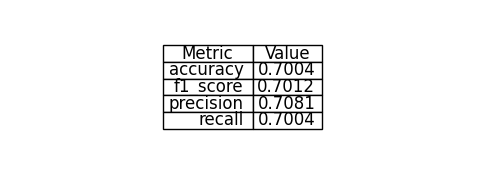

DecisionTree


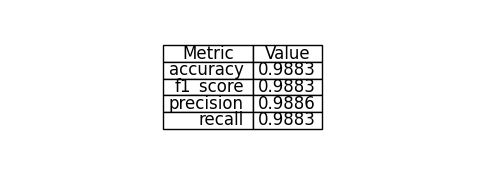

RandomForest


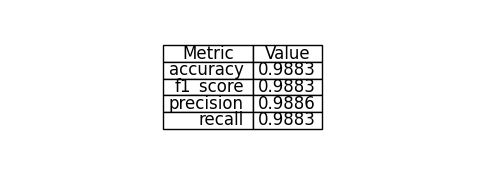

LogisticRegression


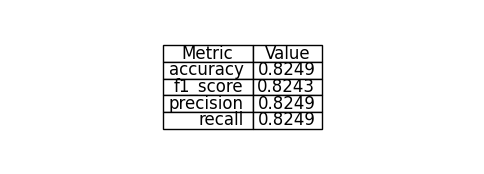

GradientBoosting


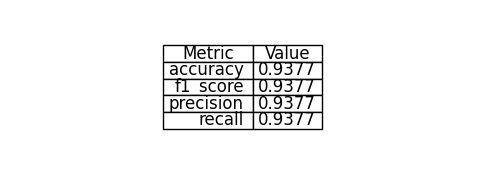

AdaBoost


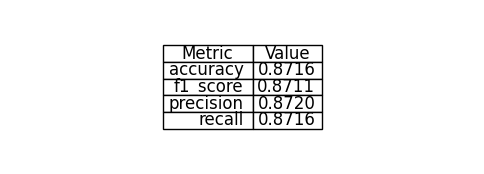

ExtraTrees


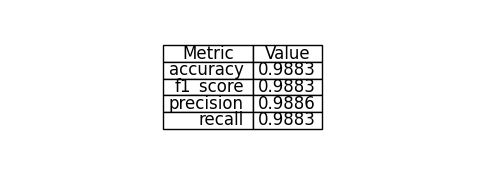

RidgeClassifier


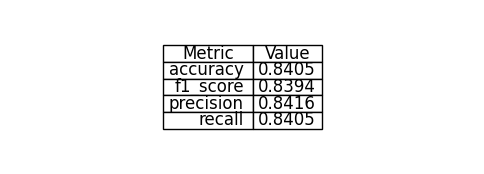

NaiveBayes


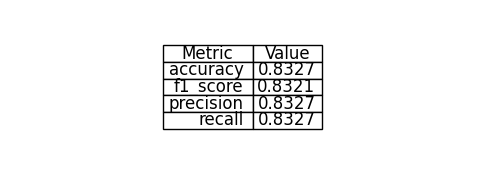

GaussianProcess


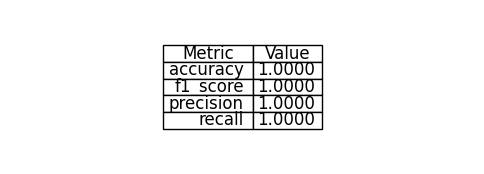

LDA


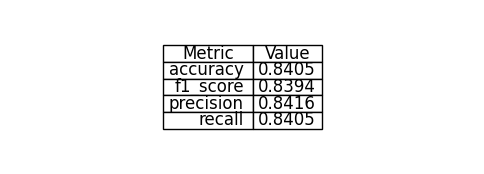

QDA


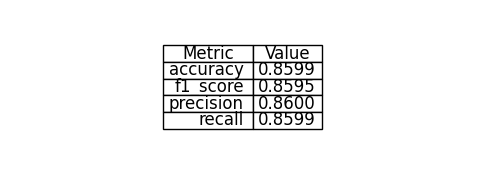

MLP


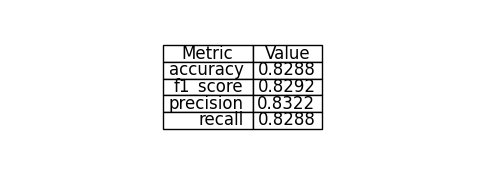

In [28]:
for key, item in train_models.items():
  print(key)
  mitrics = {k: v for k, v in item.items() if k in ["accuracy", "f1_score", "precision", "recall"]}
  plot_metrics_table(mitrics)

In [29]:
def plot_conf_matrix(conf_matrix, title):
    fig, ax = plt.subplots()
    ax.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            ax.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='red')

    plt.show()

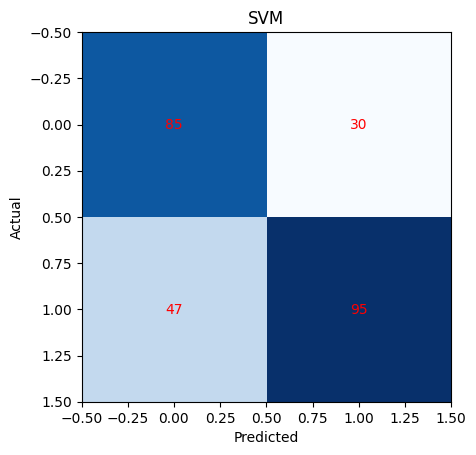

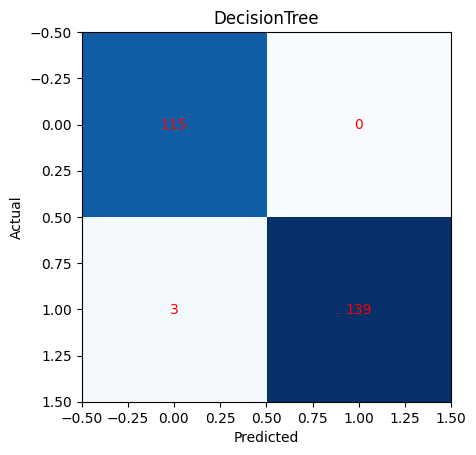

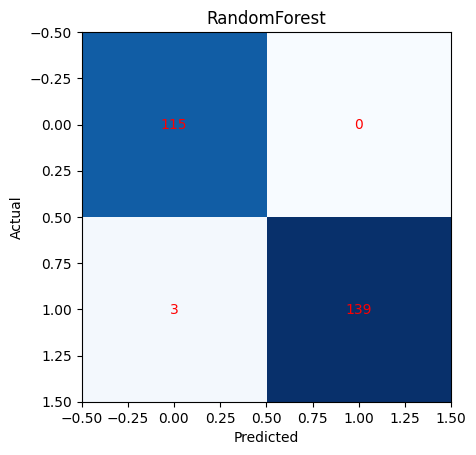

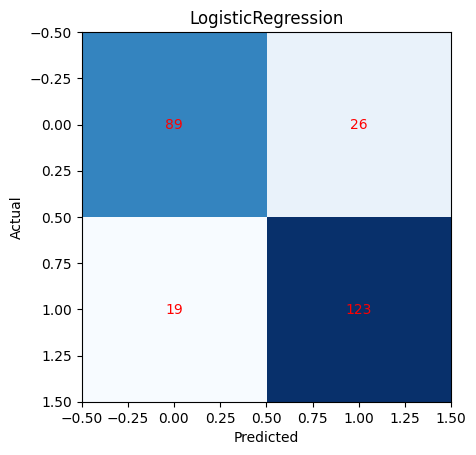

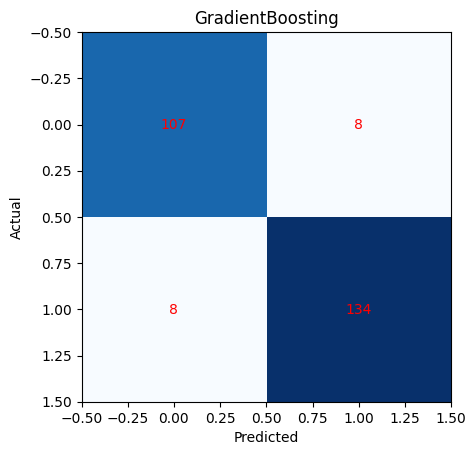

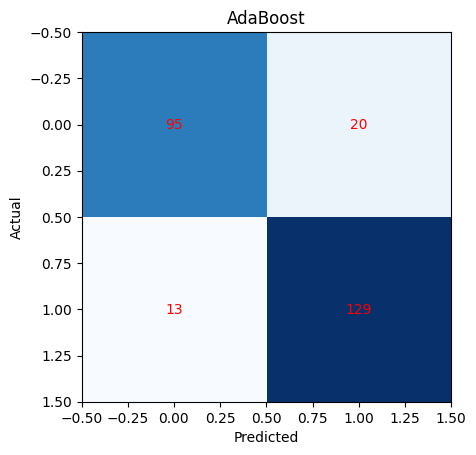

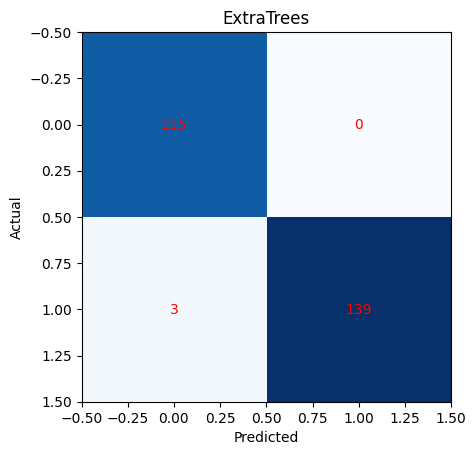

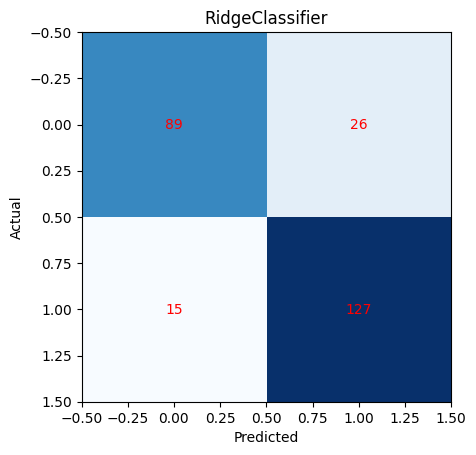

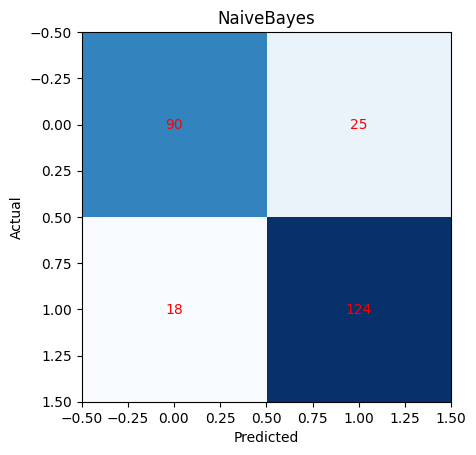

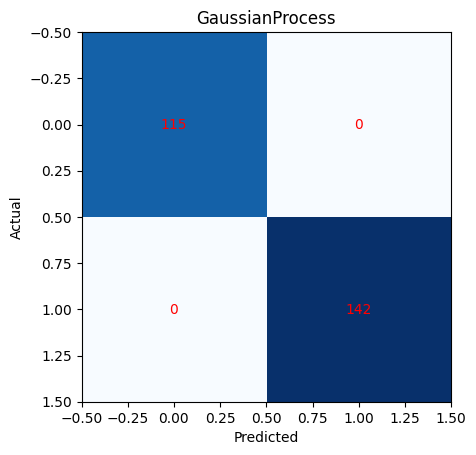

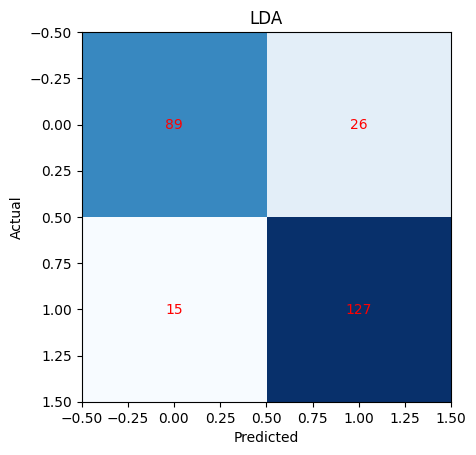

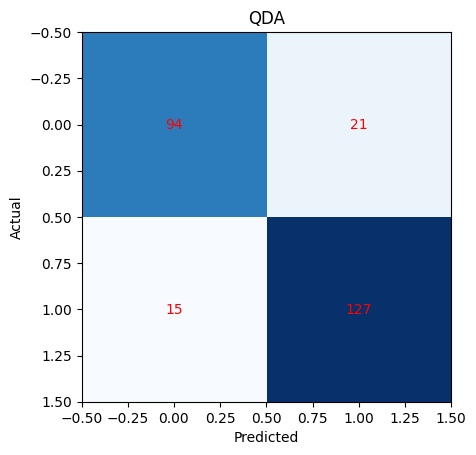

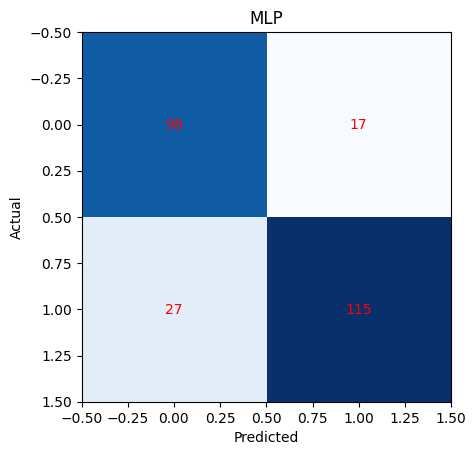

In [30]:
for key, item in train_models.items():
    conf_matrix = item["confusion_matrix"]
    title = key

    plot_conf_matrix(conf_matrix, title)



# Generate Data

## Bootstrapping

In [45]:
from sklearn.utils import resample
from scipy.stats import ks_2samp
from scipy.spatial.distance import jensenshannon

In [46]:
df = pd.read_csv("/content/train.csv")

print("Label counts:\n", df['target'].value_counts())

Label counts:
 target
1    384
0    384
Name: count, dtype: int64


In [47]:
df_label0 = df[df['target'] == 0]
df_label1 = df[df['target'] == 1]

In [48]:
df_label0_bootstrap = resample(df_label0, replace=True, n_samples=500)
df_label1_bootstrap = resample(df_label1, replace=True, n_samples=500)

In [49]:
df_label0_bootstrap = df_label0_bootstrap[df_label0_bootstrap['target'] == 0].dropna().iloc[:300]
df_label1_bootstrap = df_label1_bootstrap[df_label1_bootstrap['target'] == 1].dropna().iloc[:300]

df_synthetic = pd.concat([df_label0_bootstrap, df_label1_bootstrap])
df_synthetic = df_synthetic.sample(frac=1).reset_index(drop=True)

In [50]:
df_synthetic.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   57    1   0       140   192    0        1      148      0      0.4      1   
1   63    1   0       130   330    1        0      132      1      1.8      2   
2   61    1   0       120   260    0        1      140      1      3.6      1   
3   64    0   0       180   325    0        1      154      1      0.0      2   
4   59    1   3       170   288    0        0      159      0      0.2      1   
5   64    1   3       170   227    0        0      155      0      0.6      1   
6   48    1   2       124   255    1        1      175      0      0.0      2   
7   54    1   0       122   286    0        0      116      1      3.2      1   
8   62    0   2       130   263    0        1       97      0      1.2      1   
9   48    0   2       130   275    0        1      139      0      0.2      2   

   ca  thal  target  
0   0     1       1  
1   3     3       0  
2   1     3       0  
3   0     2       1  
4   0     3       0  
5   0     3       1  
6   2     2       1  
7   2     2       0  
8   1     3       0  
9   0     2       1

In [51]:
def ks_test_all_columns(real_df, synth_df):
    results = {}

    common_columns = real_df.columns.intersection(synth_df.columns)

    for column in common_columns:
        if pd.api.types.is_numeric_dtype(real_df[column]):
            real_vals = real_df[column].dropna()
            synth_vals = synth_df[column].dropna()

            if not real_vals.empty and not synth_vals.empty:
                stat, p_value = ks_2samp(real_vals, synth_vals)
                results[column] = {"KS_stat": stat, "p_value": p_value}

    return pd.DataFrame(results).T.sort_values(by="p_value")

In [52]:
def jsd_all_columns(real_df, synth_df, bins=20):
    results = {}

    numeric_columns = real_df.select_dtypes(include=[np.number]).columns.intersection(synth_df.columns)

    for col in numeric_columns:
        real_col = real_df[col].dropna()
        synth_col = synth_df[col].dropna()

        min_val = min(real_col.min(), synth_col.min())
        max_val = max(real_col.max(), synth_col.max())
        bin_edges = np.linspace(min_val, max_val, bins + 1)
        real_hist, _ = np.histogram(real_col, bins=bin_edges, density=True)
        synth_hist, _ = np.histogram(synth_col, bins=bin_edges, density=True)

        real_hist += 1e-8
        synth_hist += 1e-8
        real_hist = real_hist / real_hist.sum()
        synth_hist = synth_hist / synth_hist.sum()
        jsd = jensenshannon(real_hist, synth_hist)
        results[col] = jsd

    return pd.Series(results).sort_values()

In [53]:
jsd_all_columns(df, df_synthetic)

target      5.268356e-09
sex         3.422844e-03
fbs         7.595282e-03
exang       1.589360e-02
slope       1.659039e-02
thal        1.778223e-02
ca          1.841665e-02
restecg     1.922028e-02
cp          3.451245e-02
chol        4.607799e-02
oldpeak     4.750923e-02
trestbps    5.281401e-02
age         5.375327e-02
thalach     7.116818e-02
dtype: float64

In [54]:
ks_test_all_columns(df, df_synthetic)

KS_stat   p_value
thalach   0.043958  0.515278
cp        0.040365  0.623897
chol      0.031406  0.880430
trestbps  0.030833  0.893257
restecg   0.025625  0.974660
ca        0.022656  0.993281
exang     0.021146  0.997288
age       0.019531  0.999197
oldpeak   0.016510  0.999971
slope     0.011615  1.000000
sex       0.004427  1.000000
fbs       0.007500  1.000000
thal      0.008281  1.000000
target    0.000000  1.000000

In [56]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(
    data=df,
    table_name='heart_data'
)
metadata.save_to_json(filepath='metadata.json')

In [57]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 14/14 [00:00<00:00, 1321.25it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 263.53it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%





---


**Note**
Overall Score (Average): 94.72% --> this mean that the synthatic data is 94.72% similer to the real data

In [58]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 14/14 [00:00<00:00, 899.97it/s]|
Column Shapes Score: 97.83%

(2/2) Evaluating Column Pair Trends: |██████████| 91/91 [00:00<00:00, 190.96it/s]|
Column Pair Trends Score: 94.14%

Overall Score (Average): 95.98%



In [60]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata,
    column_name='trestbps'
)

fig.show()

In [61]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata,
    column_name='chol'
)

fig.show()

In [62]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata,
    column_name='thalach'
)

fig.show()

In [63]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata,
    column_name='oldpeak'
)

fig.show()

In [64]:
X = df_synthetic.drop(columns=['target'])
y = df_synthetic['target']

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



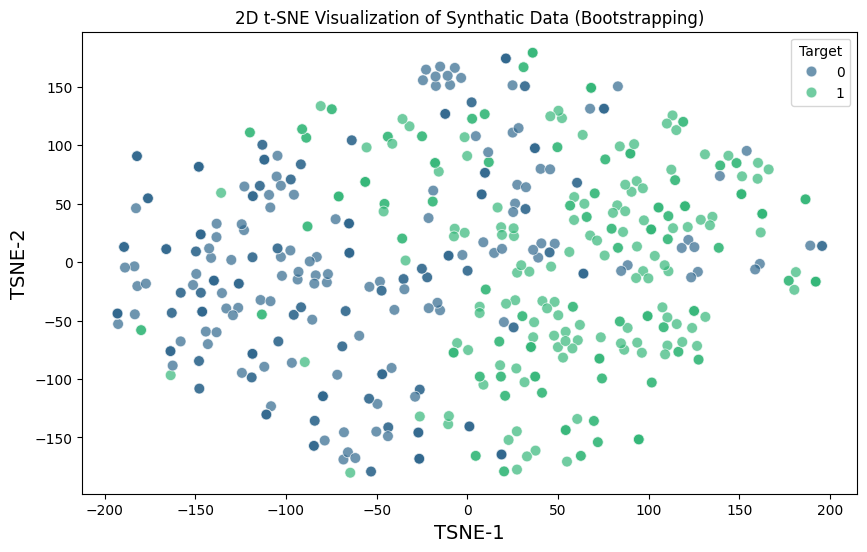

In [68]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2'])
tsne_df['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE-1', y='TSNE-2', hue='target', palette='viridis', s=60, alpha=0.7)
plt.title('2D t-SNE Visualization of Synthatic Data (Bootstrapping)', fontsize=12)
plt.xlabel('TSNE-1', fontsize=14)
plt.ylabel('TSNE-2', fontsize=14)
plt.legend(title='Target', loc='best')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



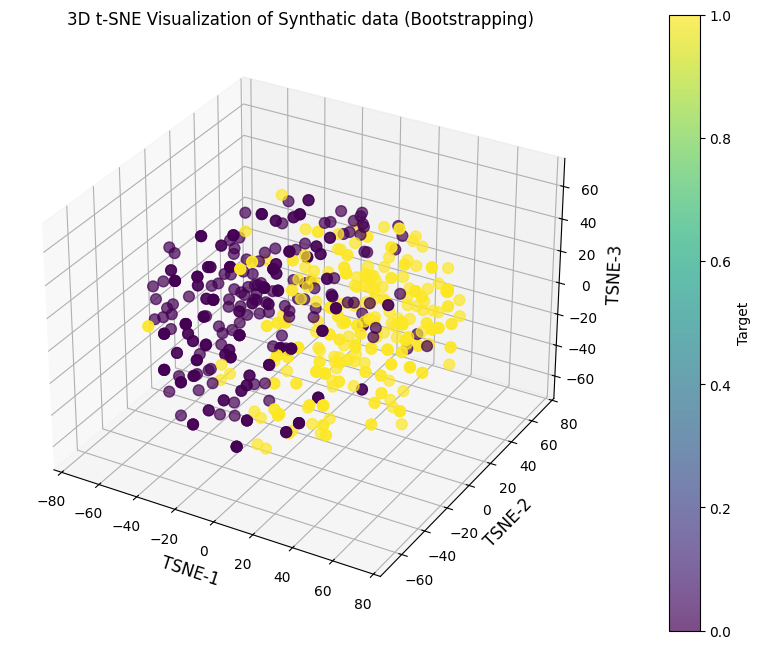

In [69]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2', 'TSNE-3'])
tsne_df['target'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    tsne_df['TSNE-1'], tsne_df['TSNE-2'], tsne_df['TSNE-3'],
    c=tsne_df['target'], cmap='viridis', s=60, alpha=0.7
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Target')

ax.set_title('3D t-SNE Visualization of Synthatic data (Bootstrapping)', fontsize=12)
ax.set_xlabel('TSNE-1', fontsize=12)
ax.set_ylabel('TSNE-2', fontsize=12)
ax.set_zlabel('TSNE-3', fontsize=12)

plt.show()

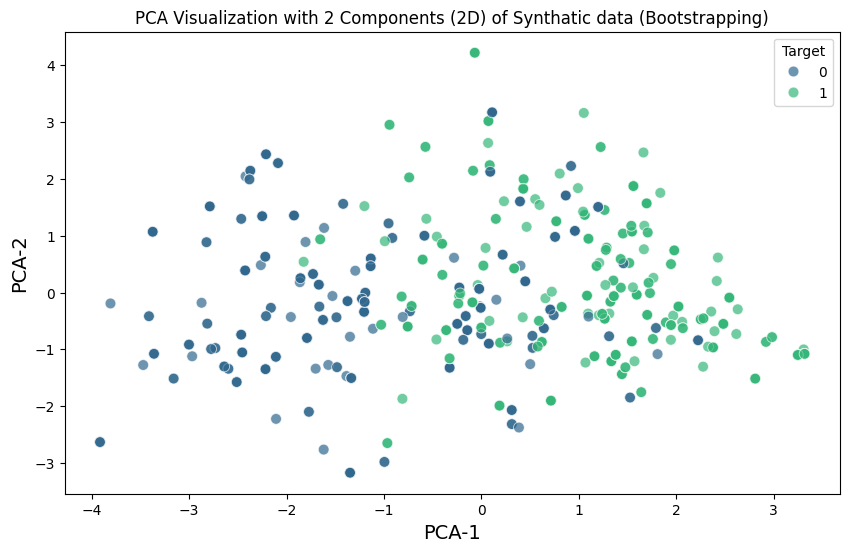

In [70]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA-1', 'PCA-2'])
pca_df['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA-1', y='PCA-2', hue='target', palette='viridis', s=60, alpha=0.7)
plt.title('PCA Visualization with 2 Components (2D) of Synthatic data (Bootstrapping)', fontsize=12)
plt.xlabel('PCA-1', fontsize=14)
plt.ylabel('PCA-2', fontsize=14)
plt.legend(title='Target', loc='best')
plt.show()

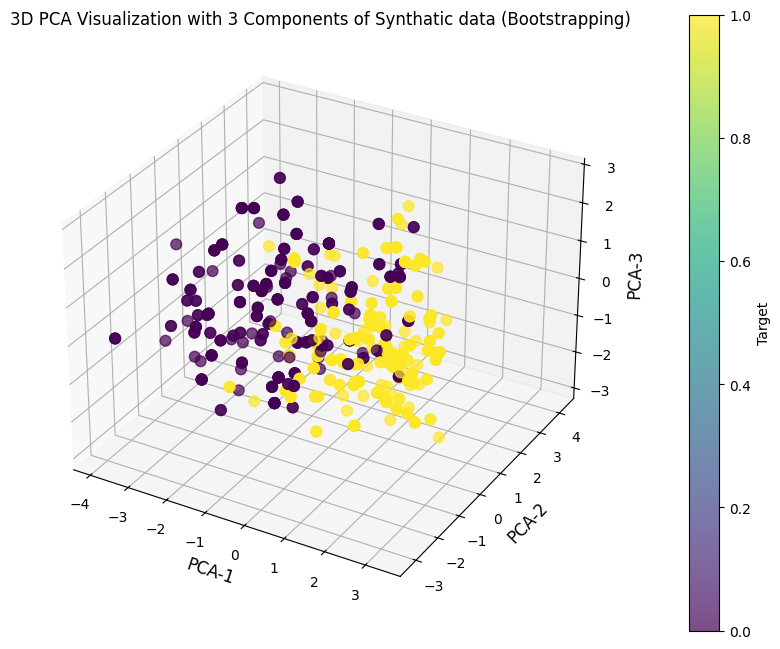

In [71]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA-1', 'PCA-2', 'PCA-3'])
pca_df['target'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df['PCA-1'], pca_df['PCA-2'], pca_df['PCA-3'],
    c=pca_df['target'], cmap='viridis', s=60, alpha=0.7
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Target')

ax.set_title('3D PCA Visualization with 3 Components of Synthatic data (Bootstrapping)', fontsize=12)
ax.set_xlabel('PCA-1', fontsize=12)
ax.set_ylabel('PCA-2', fontsize=12)
ax.set_zlabel('PCA-3', fontsize=12)

plt.show()

In [72]:
scaler = MinMaxScaler()
synth_df_scaled = scaler.fit_transform(df_synthetic)
synth_df_scaled = pd.DataFrame(synth_df_scaled, columns=df.columns)

In [73]:
synth_train_data, synth_test_data = train_test_split(synth_df_scaled, test_size=0.25)

In [74]:
synth_X_train = synth_train_data.drop(columns=['target']).to_numpy()
synth_y_train = synth_train_data['target'].to_numpy()

synth_X_test = synth_test_data.drop(columns=['target']).to_numpy()
synth_y_test = synth_test_data['target'].to_numpy()

In [75]:
print("X_train: ", synth_X_train.shape)
print("y_train: ",synth_y_train.shape)
print("X_test: ",synth_X_test.shape)
print("y_test:",synth_y_test.shape)

X_train:  (450, 13)
y_train:  (450,)
X_test:  (150, 13)
y_test: (150,)


In [76]:
train_models_synthatic = eval_moduls(synth_X_train, synth_y_train, synth_X_test, synth_y_test, list_models)

SVM
{'model': <__main__.ClassifierModel object at 0x78a5064a8490>, 'accuracy': 0.8733333333333333, 'f1_score': 0.87328264639189, 'precision': 0.8739316239316239, 'recall': 0.8733333333333333, 'confusion_matrix': array([[64, 11],
       [ 8, 67]])}
------------------------------------------------------------------------------------------>
DecisionTree
{'model': <__main__.ClassifierModel object at 0x78a5069444d0>, 'accuracy': 0.9266666666666666, 'f1_score': 0.9266373215953047, 'precision': 0.9273504273504273, 'recall': 0.9266666666666666, 'confusion_matrix': array([[71,  4],
       [ 7, 68]])}
------------------------------------------------------------------------------------------>
RandomForest
{'model': <__main__.ClassifierModel object at 0x78a506616a50>, 'accuracy': 0.96, 'f1_score': 0.9599928876244664, 'precision': 0.9603273438889877, 'recall': 0.96, 'confusion_matrix': array([[71,  4],
       [ 2, 73]])}
------------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [77]:
def test_model(y_test, x_test, pretrained_model):
  """
  Evaluates a pretrained model on test data and returns various metrics.

  Args:
    y_test: The true labels for the test set.
    x_test: The features for the test set.
    pretrained_model: A trained scikit-learn compatible model.

  Returns:
    A dictionary containing 'accuracy', 'f1_score', 'precision', 'recall', and 'confusion_matrix'.
  """
  return pretrained_model.evaluate(x_test, y_test)


In [78]:
test_on_real_model={}
for key, item in train_models_synthatic.items():
  test_on_real_model[key] = test_model(y_test, X_test, item["model"])
  print(test_on_real_model[key])
  print("---"*30)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



{'model': 'SVM', 'accuracy': 0.5525291828793775, 'f1_score': 0.393278917137201, 'precision': 0.30528849793335255, 'recall': 0.5525291828793775, 'confusion_matrix': array([[  0, 115],
       [  0, 142]])}
------------------------------------------------------------------------------------------
{'model': 'DecisionTree', 'accuracy': 0.7354085603112841, 'f1_score': 0.7359167075098082, 'precision': 0.7372259287353236, 'recall': 0.7354085603112841, 'confusion_matrix': array([[ 84,  31],
       [ 37, 105]])}
------------------------------------------------------------------------------------------
{'model': 'RandomForest', 'accuracy': 0.7003891050583657, 'f1_score': 0.6994904493814773, 'precision': 0.7221905177229491, 'recall': 0.7003891050583657, 'confusion_matrix': array([[93, 22],
       [55, 87]])}
------------------------------------------------------------------------------------------
{'model': 'LogisticRegression', 'accuracy': 0.4474708171206226, 'f1_score': 0.27666206434877205, 'pre

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## Data Swapping or Shuffling

In [79]:
df = pd.read_csv("/content/train.csv")

In [80]:
df_label0 = df[df['target'] == 0].copy()
df_label1 = df[df['target'] == 1].copy()

In [81]:
def generate_shuffled_data(df_label, n_samples=5000):
    features = df_label.drop(columns='target')
    label_value = df_label['target'].iloc[0]

    repeated_df = pd.concat([df_label] * ((n_samples // len(df_label)) + 1), ignore_index=True).iloc[:n_samples]

    for col in features.columns:
        repeated_df[col] = np.random.permutation(repeated_df[col].values)

    repeated_df['target'] = label_value
    return repeated_df

In [82]:
synthetic_label0 = generate_shuffled_data(df_label0, n_samples=300)
synthetic_label1 = generate_shuffled_data(df_label1, n_samples=300)

In [83]:
df_synthetic = pd.concat([synthetic_label0, synthetic_label1], ignore_index=True)
df_synthetic = df_synthetic.sample(frac=1).reset_index(drop=True)

In [84]:
df_synthetic.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   43    1   2       140   177    1        0      178      0      0.0      2   
1   44    1   0       134   224    0        0      114      0      0.9      2   
2   60    0   0       132   247    1        1      155      1      1.8      1   
3   60    1   0       125   269    1        0      141      1      1.2      1   
4   49    1   1       130   257    0        0      163      0      0.0      2   
5   52    1   0       110   131    0        0      146      1      3.0      2   
6   45    0   2       120   195    0        0      184      0      1.8      2   
7   50    1   0       130   230    0        1      111      0      3.6      0   
8   60    1   2       132   234    0        0      128      1      0.0      1   
9   62    1   0       120   256    0        1      195      1      1.4      1   

   ca  thal  target  
0   0     2       1  
1   0     3       0  
2   2     2       0  
3   1     3       0  
4   1     2       1  
5   1     2       0  
6   1     2       1  
7   1     2       0  
8   1     3       0  
9   3     1       0

In [85]:
jsd_all_columns(df, df_synthetic)

target      5.268356e-09
fbs         2.513329e-03
restecg     2.881544e-03
slope       3.421705e-03
ca          8.520751e-03
sex         9.826978e-03
exang       1.085504e-02
cp          1.228398e-02
thal        1.281404e-02
age         1.949554e-02
oldpeak     2.576737e-02
thalach     2.989940e-02
chol        3.353594e-02
trestbps    4.408735e-02
dtype: float64

In [86]:
ks_test_all_columns(df, df_synthetic)

KS_stat   p_value
chol      0.022656  0.993281
trestbps  0.021979  0.995419
age       0.019167  0.999416
oldpeak   0.019115  0.999443
thalach   0.019010  0.999494
exang     0.014479  0.999999
sex       0.012760  1.000000
cp        0.010365  1.000000
fbs       0.002500  1.000000
restecg   0.003958  1.000000
slope     0.004687  1.000000
ca        0.002552  1.000000
thal      0.007344  1.000000
target    0.000000  1.000000

In [87]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 14/14 [00:00<00:00, 1460.99it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 207.06it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [88]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 14/14 [00:00<00:00, 1030.61it/s]|
Column Shapes Score: 98.76%

(2/2) Evaluating Column Pair Trends: |██████████| 91/91 [00:00<00:00, 176.73it/s]|
Column Pair Trends Score: 93.35%

Overall Score (Average): 96.06%



In [89]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata,
    column_name='trestbps'
)

fig.show()

In [90]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata,
    column_name='chol'
)

fig.show()

In [91]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata,
    column_name='thalach'
)

fig.show()

In [93]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata,
    column_name='oldpeak'
)

fig.show()

In [94]:
X = df_synthetic.drop(columns=['target'])
y = df_synthetic['target']

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



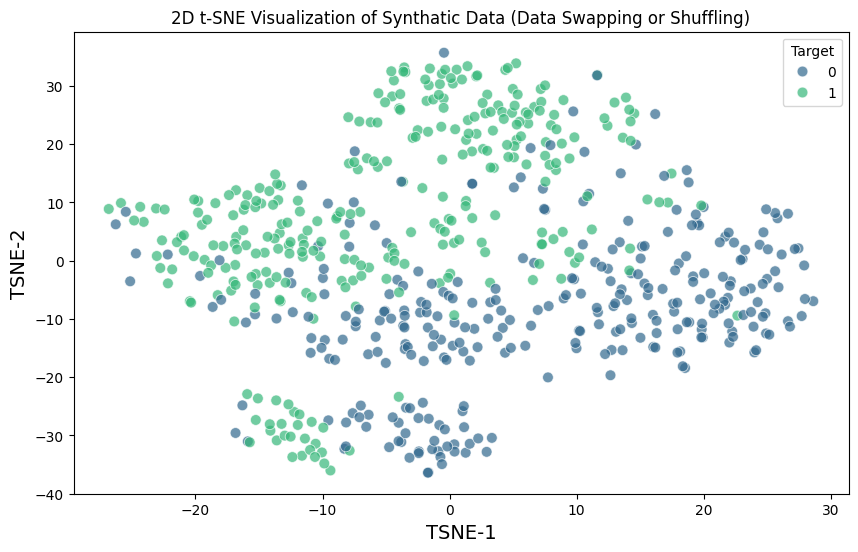

In [95]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2'])
tsne_df['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE-1', y='TSNE-2', hue='target', palette='viridis', s=60, alpha=0.7)
plt.title('2D t-SNE Visualization of Synthatic Data (Data Swapping or Shuffling)', fontsize=12)
plt.xlabel('TSNE-1', fontsize=14)
plt.ylabel('TSNE-2', fontsize=14)
plt.legend(title='Target', loc='best')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



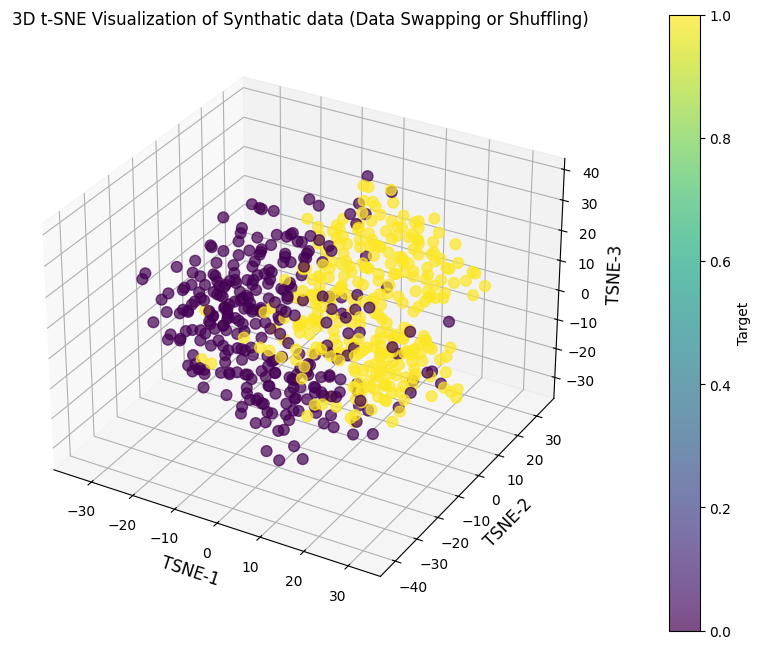

In [96]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2', 'TSNE-3'])
tsne_df['target'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    tsne_df['TSNE-1'], tsne_df['TSNE-2'], tsne_df['TSNE-3'],
    c=tsne_df['target'], cmap='viridis', s=60, alpha=0.7
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Target')

ax.set_title('3D t-SNE Visualization of Synthatic data (Data Swapping or Shuffling)', fontsize=12)
ax.set_xlabel('TSNE-1', fontsize=12)
ax.set_ylabel('TSNE-2', fontsize=12)
ax.set_zlabel('TSNE-3', fontsize=12)

plt.show()

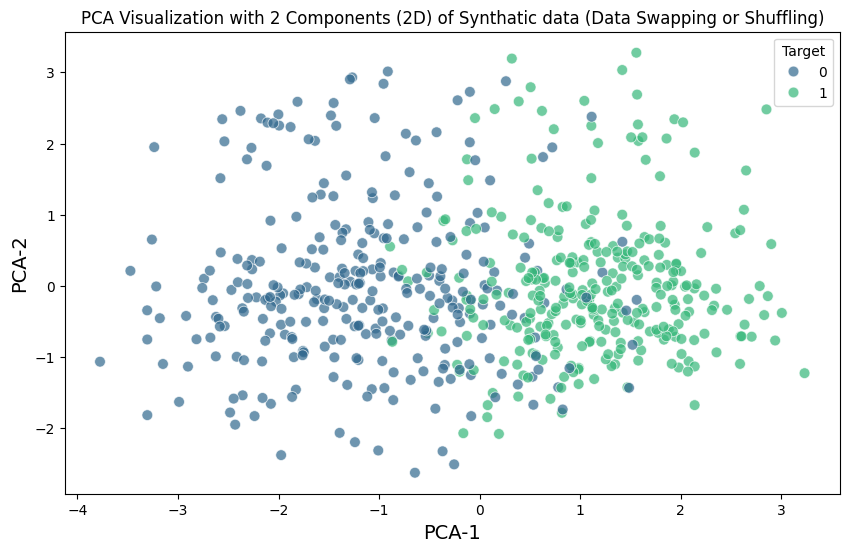

In [97]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA-1', 'PCA-2'])
pca_df['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA-1', y='PCA-2', hue='target', palette='viridis', s=60, alpha=0.7)
plt.title('PCA Visualization with 2 Components (2D) of Synthatic data (Data Swapping or Shuffling)', fontsize=12)
plt.xlabel('PCA-1', fontsize=14)
plt.ylabel('PCA-2', fontsize=14)
plt.legend(title='Target', loc='best')
plt.show()

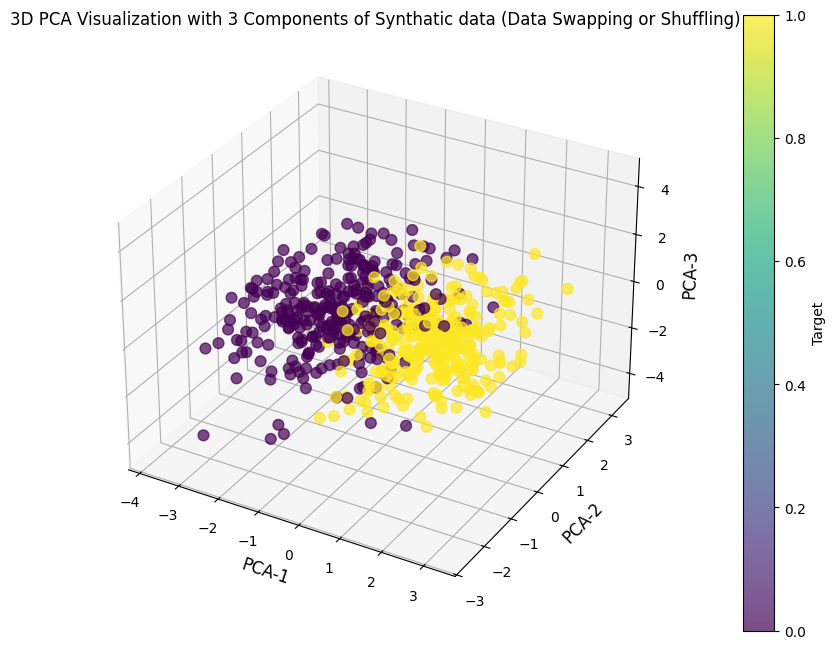

In [98]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA-1', 'PCA-2', 'PCA-3'])
pca_df['target'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df['PCA-1'], pca_df['PCA-2'], pca_df['PCA-3'],
    c=pca_df['target'], cmap='viridis', s=60, alpha=0.7
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Target')

ax.set_title('3D PCA Visualization with 3 Components of Synthatic data (Data Swapping or Shuffling)', fontsize=12)
ax.set_xlabel('PCA-1', fontsize=12)
ax.set_ylabel('PCA-2', fontsize=12)
ax.set_zlabel('PCA-3', fontsize=12)

plt.show()

In [99]:
scaler = MinMaxScaler()
synth_df_scaled = scaler.fit_transform(df_synthetic)
synth_df_scaled = pd.DataFrame(synth_df_scaled, columns=df.columns)

In [100]:
synth_train_data, synth_test_data = train_test_split(synth_df_scaled, test_size=0.25)

In [101]:
synth_X_train = synth_train_data.drop(columns=['target']).to_numpy()
synth_y_train = synth_train_data['target'].to_numpy()

synth_X_test = synth_test_data.drop(columns=['target']).to_numpy()
synth_y_test = synth_test_data['target'].to_numpy()

In [102]:
print("X_train: ", synth_X_train.shape)
print("y_train: ",synth_y_train.shape)
print("X_test: ",synth_X_test.shape)
print("y_test:",synth_y_test.shape)

X_train:  (450, 13)
y_train:  (450,)
X_test:  (150, 13)
y_test: (150,)


In [103]:
train_models_synthatic = eval_moduls(synth_X_train, synth_y_train, synth_X_test, synth_y_test, list_models)

SVM
{'model': <__main__.ClassifierModel object at 0x78a506101a90>, 'accuracy': 0.9333333333333333, 'f1_score': 0.9332977207977209, 'precision': 0.9335948178522612, 'recall': 0.9333333333333333, 'confusion_matrix': array([[67,  6],
       [ 4, 73]])}
------------------------------------------------------------------------------------------>
DecisionTree
{'model': <__main__.ClassifierModel object at 0x78a505fe1250>, 'accuracy': 0.82, 'f1_score': 0.8200240096038416, 'precision': 0.8201209103840683, 'recall': 0.82, 'confusion_matrix': array([[60, 13],
       [14, 63]])}
------------------------------------------------------------------------------------------>
RandomForest
{'model': <__main__.ClassifierModel object at 0x78a50627fb90>, 'accuracy': 0.9466666666666667, 'f1_score': 0.9466381766381766, 'precision': 0.9469471682415167, 'recall': 0.9466666666666667, 'confusion_matrix': array([[68,  5],
       [ 3, 74]])}
----------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [104]:
test_on_real_model={}
for key, item in train_models_synthatic.items():
  test_on_real_model[key] = test_model(y_test, X_test, item["model"])
  print(test_on_real_model[key])
  print("---"*30)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



{'model': 'SVM', 'accuracy': 0.4474708171206226, 'f1_score': 0.27666206434877205, 'precision': 0.20023013217459767, 'recall': 0.4474708171206226, 'confusion_matrix': array([[115,   0],
       [142,   0]])}
------------------------------------------------------------------------------------------
{'model': 'DecisionTree', 'accuracy': 0.5525291828793775, 'f1_score': 0.5287091640266572, 'precision': 0.5398884704217732, 'recall': 0.5525291828793775, 'confusion_matrix': array([[ 35,  80],
       [ 35, 107]])}
------------------------------------------------------------------------------------------
{'model': 'RandomForest', 'accuracy': 0.6731517509727627, 'f1_score': 0.6601138853485977, 'precision': 0.749152828111511, 'recall': 0.6731517509727627, 'confusion_matrix': array([[106,   9],
       [ 75,  67]])}
------------------------------------------------------------------------------------------
{'model': 'LogisticRegression', 'accuracy': 0.5836575875486382, 'f1_score': 0.5398713118557477, 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## SMOTE (Synthetic Minority Over-sampling Technique)

In [105]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


In [106]:
X = df.drop(columns='target')
y = df['target']

In [107]:
smote = SMOTE(sampling_strategy={0: 400, 1: 400})
X_resampled, y_resampled = smote.fit_resample(X, y)

In [108]:
df_synthetic = pd.DataFrame(X_resampled, columns=X.columns)
df_synthetic['target'] = y_resampled

In [109]:
df_synthetic = df_synthetic.sample(frac=1).reset_index(drop=True)

In [110]:
df_synthetic

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    0   0       108   269    0        1      169      1      1.8   
1     52    1   0       112   230    0        1      160      0      0.0   
2     43    0   2       122   213    0        1      165      0      0.2   
3     64    1   2       140   335    0        1      158      0      0.0   
4     51    1   3       125   213    0        0      125      1      1.4   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
795   34    1   1       120   187    0        0      174      0      0.0   
796   49    1   2       120   188    0        1      139      0      2.0   
797   38    1   3       120   231    0        1      182      1      3.8   
798   52    1   2       138   223    0        1      169      0      0.0   
799   49    1   2       118   149    0        0      126      0      0.8   

     slope  ca  thal  target  
0        1   2     2       0  
1        2   1     2       0  
2        1   0     2       1  
3        2   0     2       0  
4        2   1     2       1  
..     ...  ..   ...     ...  
795      2   0     2       1  
796      1   3     3       0  
797      1   0     3       0  
798      2   4     2       1  
799      2   3     2       0  

[800 rows x 14 columns]

In [111]:
jsd_all_columns(df, df_synthetic)

target      5.268356e-09
exang       8.548464e-04
thal        1.508982e-03
slope       2.238301e-03
sex         3.422844e-03
ca          4.424608e-03
fbs         4.621706e-03
cp          6.085047e-03
restecg     6.720815e-03
chol        8.512965e-03
thalach     8.657544e-03
age         8.991107e-03
trestbps    9.913868e-03
oldpeak     1.249200e-02
dtype: float64

In [112]:
ks_test_all_columns(df, df_synthetic)

KS_stat  p_value
restecg   0.008542      1.0
cp        0.007656      1.0
age       0.002552      1.0
sex       0.004427      1.0
trestbps  0.005625      1.0
chol      0.007448      1.0
fbs       0.004583      1.0
thalach   0.004635      1.0
exang     0.001146      1.0
oldpeak   0.004323      1.0
slope     0.001615      1.0
ca        0.002448      1.0
thal      0.001198      1.0
target    0.000000      1.0

In [113]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 14/14 [00:00<00:00, 1664.74it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 251.64it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [114]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 14/14 [00:00<00:00, 513.54it/s]|
Column Shapes Score: 99.59%

(2/2) Evaluating Column Pair Trends: |██████████| 91/91 [00:00<00:00, 150.16it/s]|
Column Pair Trends Score: 99.18%

Overall Score (Average): 99.38%



In [115]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata,
    column_name='trestbps'
)

fig.show()

In [116]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata,
    column_name='chol'
)

fig.show()

In [117]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata,
    column_name='thalach'
)

fig.show()

In [118]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata,
    column_name='oldpeak'
)

fig.show()

In [119]:
X = df_synthetic.drop(columns=['target'])
y = df_synthetic['target']

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



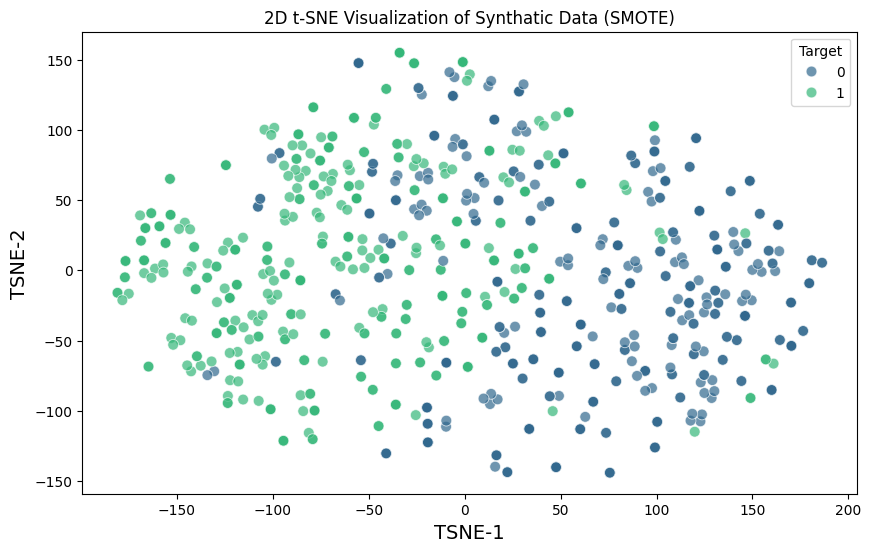

In [120]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2'])
tsne_df['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE-1', y='TSNE-2', hue='target', palette='viridis', s=60, alpha=0.7)
plt.title('2D t-SNE Visualization of Synthatic Data (SMOTE)', fontsize=12)
plt.xlabel('TSNE-1', fontsize=14)
plt.ylabel('TSNE-2', fontsize=14)
plt.legend(title='Target', loc='best')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



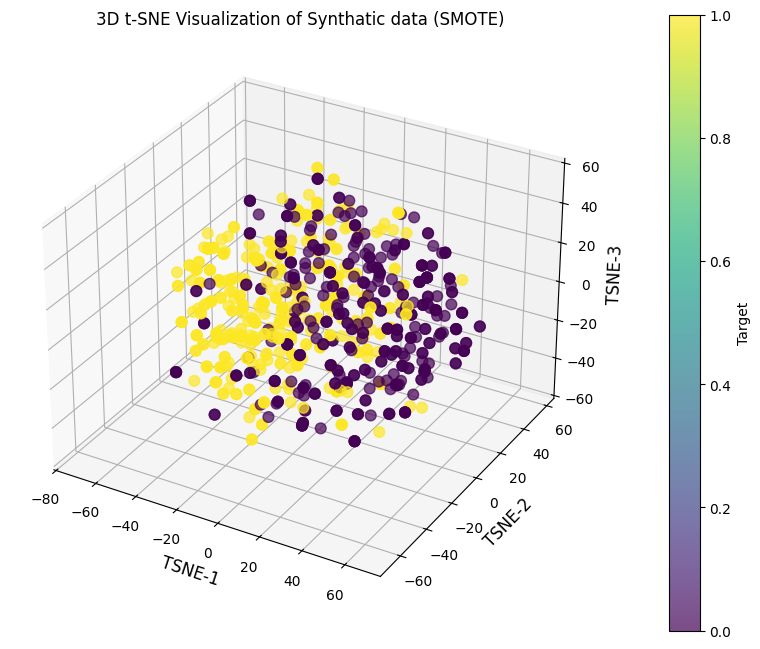

In [121]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=3, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2', 'TSNE-3'])
tsne_df['target'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    tsne_df['TSNE-1'], tsne_df['TSNE-2'], tsne_df['TSNE-3'],
    c=tsne_df['target'], cmap='viridis', s=60, alpha=0.7
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Target')

ax.set_title('3D t-SNE Visualization of Synthatic data (SMOTE)', fontsize=12)
ax.set_xlabel('TSNE-1', fontsize=12)
ax.set_ylabel('TSNE-2', fontsize=12)
ax.set_zlabel('TSNE-3', fontsize=12)

plt.show()

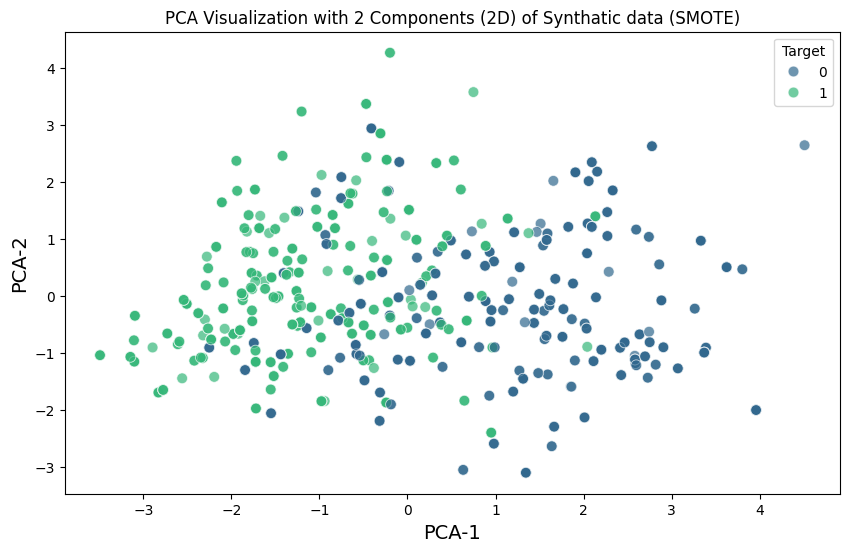

In [122]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA-1', 'PCA-2'])
pca_df['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA-1', y='PCA-2', hue='target', palette='viridis', s=60, alpha=0.7)
plt.title('PCA Visualization with 2 Components (2D) of Synthatic data (SMOTE)', fontsize=12)
plt.xlabel('PCA-1', fontsize=14)
plt.ylabel('PCA-2', fontsize=14)
plt.legend(title='Target', loc='best')
plt.show()

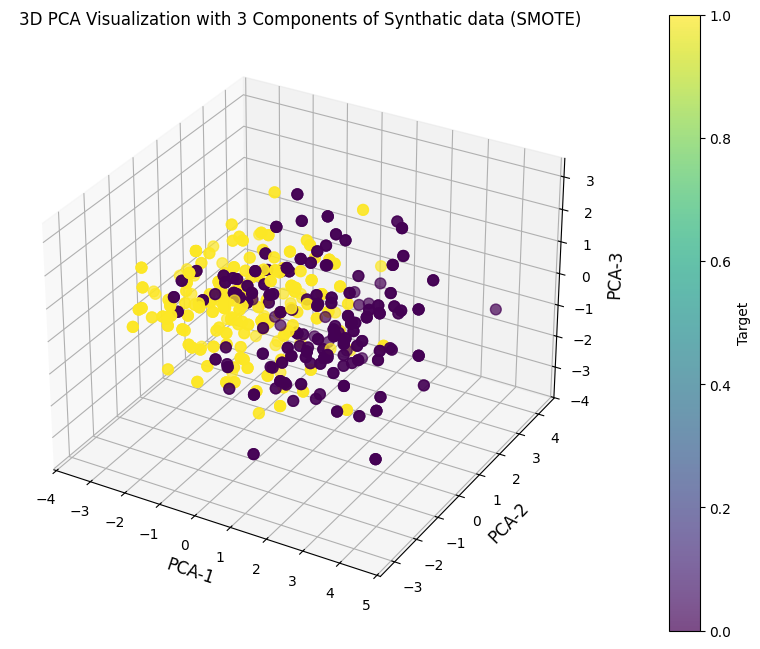

In [123]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA-1', 'PCA-2', 'PCA-3'])
pca_df['target'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df['PCA-1'], pca_df['PCA-2'], pca_df['PCA-3'],
    c=pca_df['target'], cmap='viridis', s=60, alpha=0.7
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Target')

ax.set_title('3D PCA Visualization with 3 Components of Synthatic data (SMOTE)', fontsize=12)
ax.set_xlabel('PCA-1', fontsize=12)
ax.set_ylabel('PCA-2', fontsize=12)
ax.set_zlabel('PCA-3', fontsize=12)

plt.show()

In [124]:
scaler = MinMaxScaler()
synth_df_scaled = scaler.fit_transform(df_synthetic)
synth_df_scaled = pd.DataFrame(synth_df_scaled, columns=df.columns)

In [125]:
synth_train_data, synth_test_data = train_test_split(synth_df_scaled, test_size=0.25)

In [126]:
synth_X_train = synth_train_data.drop(columns=['target']).to_numpy()
synth_y_train = synth_train_data['target'].to_numpy()

synth_X_test = synth_test_data.drop(columns=['target']).to_numpy()
synth_y_test = synth_test_data['target'].to_numpy()

In [127]:
print("X_train: ", synth_X_train.shape)
print("y_train: ",synth_y_train.shape)
print("X_test: ",synth_X_test.shape)
print("y_test:",synth_y_test.shape)

X_train:  (600, 13)
y_train:  (600,)
X_test:  (200, 13)
y_test: (200,)


In [128]:
train_models_synthatic = eval_moduls(synth_X_train, synth_y_train, synth_X_test, synth_y_test, list_models)

SVM
{'model': <__main__.ClassifierModel object at 0x78a506081350>, 'accuracy': 0.905, 'f1_score': 0.9049881247031176, 'precision': 0.9061084976478831, 'recall': 0.905, 'confusion_matrix': array([[90, 12],
       [ 7, 91]])}
------------------------------------------------------------------------------------------>
DecisionTree
{'model': <__main__.ClassifierModel object at 0x78a5061b7710>, 'accuracy': 0.985, 'f1_score': 0.9850011252531821, 'precision': 0.985051505150515, 'recall': 0.985, 'confusion_matrix': array([[100,   2],
       [  1,  97]])}
------------------------------------------------------------------------------------------>
RandomForest
{'model': <__main__.ClassifierModel object at 0x78a505750710>, 'accuracy': 0.995, 'f1_score': 0.9950003750843939, 'precision': 0.9950505050505051, 'recall': 0.995, 'confusion_matrix': array([[101,   1],
       [  0,  98]])}
------------------------------------------------------------------------------------------>
LogisticRegression
{'model'

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [129]:
test_on_real_model={}
for key, item in train_models_synthatic.items():
  test_on_real_model[key] = test_model(y_test, X_test, item["model"])
  print(test_on_real_model[key])
  print("---"*30)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



{'model': 'SVM', 'accuracy': 0.5525291828793775, 'f1_score': 0.393278917137201, 'precision': 0.30528849793335255, 'recall': 0.5525291828793775, 'confusion_matrix': array([[  0, 115],
       [  0, 142]])}
------------------------------------------------------------------------------------------
{'model': 'DecisionTree', 'accuracy': 0.642023346303502, 'f1_score': 0.6147304765917371, 'precision': 0.7640179968674716, 'recall': 0.642023346303502, 'confusion_matrix': array([[111,   4],
       [ 88,  54]])}
------------------------------------------------------------------------------------------
{'model': 'RandomForest', 'accuracy': 0.6070038910505836, 'f1_score': 0.5656729205367338, 'precision': 0.7559124651599195, 'recall': 0.6070038910505836, 'confusion_matrix': array([[112,   3],
       [ 98,  44]])}
------------------------------------------------------------------------------------------
{'model': 'LogisticRegression', 'accuracy': 0.4669260700389105, 'f1_score': 0.3180183215261741, 'pr

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



## sdv (GAN based methods)

### GaussianCopulaSynthesizer

In [130]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df)

synthetic_data_GCS = synthesizer.sample(num_rows=1000)

In [131]:
synthetic_data_GCS.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   55    1   0       133   227    0        1      131      1      1.8      1   
1   58    1   0       108   269    0        1      156      0      0.1      1   
2   58    1   2       135   288    1        0      115      0      0.0      2   
3   51    1   0       109   206    0        1      149      0      0.0      1   
4   50    1   0       156   248    0        1      188      0      0.0      2   
5   44    1   0       131   217    0        0      158      0      0.0      2   
6   45    1   1       103   274    0        1      162      0      0.0      2   
7   49    1   2       132   282    0        0      191      0      0.0      1   
8   68    1   3       130   262    0        1      180      0      0.8      1   
9   55    0   2       176   274    1        1      165      1      1.0      1   

   ca  thal  target  
0   2     3       1  
1   0     2       1  
2   2     2       1  
3   0     3       0  
4   1     2       0  
5   0     2       1  
6   1     2       1  
7   0     3       1  
8   0     1       0  
9   0     3       1

In [132]:
df_label0 = synthetic_data_GCS[synthetic_data_GCS['target'] == 0][:300]
df_label1 = synthetic_data_GCS[synthetic_data_GCS['target'] == 1][:300]

In [133]:
synthetic_data_GCS = pd.concat([df_label0, df_label1])
synthetic_data_GCS = synthetic_data_GCS.sample(frac=1).reset_index(drop=True)

In [134]:
jsd_all_columns(df, df_synthetic)

target      5.268356e-09
exang       8.548464e-04
thal        1.508982e-03
slope       2.238301e-03
sex         3.422844e-03
ca          4.424608e-03
fbs         4.621706e-03
cp          6.085047e-03
restecg     6.720815e-03
chol        8.512965e-03
thalach     8.657544e-03
age         8.991107e-03
trestbps    9.913868e-03
oldpeak     1.249200e-02
dtype: float64

In [135]:
ks_test_all_columns(df, df_synthetic)

KS_stat  p_value
restecg   0.008542      1.0
cp        0.007656      1.0
age       0.002552      1.0
sex       0.004427      1.0
trestbps  0.005625      1.0
chol      0.007448      1.0
fbs       0.004583      1.0
thalach   0.004635      1.0
exang     0.001146      1.0
oldpeak   0.004323      1.0
slope     0.001615      1.0
ca        0.002448      1.0
thal      0.001198      1.0
target    0.000000      1.0

In [136]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 14/14 [00:00<00:00, 1391.41it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 234.80it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [137]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 14/14 [00:00<00:00, 1000.55it/s]|
Column Shapes Score: 99.59%

(2/2) Evaluating Column Pair Trends: |██████████| 91/91 [00:00<00:00, 183.04it/s]|
Column Pair Trends Score: 99.18%

Overall Score (Average): 99.38%



In [138]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata,
    column_name='trestbps'
)

fig.show()

In [139]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata,
    column_name='chol'
)

fig.show()

In [140]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata,
    column_name='thalach'
)

fig.show()

In [141]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=df_synthetic,
    metadata=metadata,
    column_name='oldpeak'
)

fig.show()

In [142]:
X = synthetic_data_GCS.drop(columns=['target'])
y = synthetic_data_GCS['target']

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



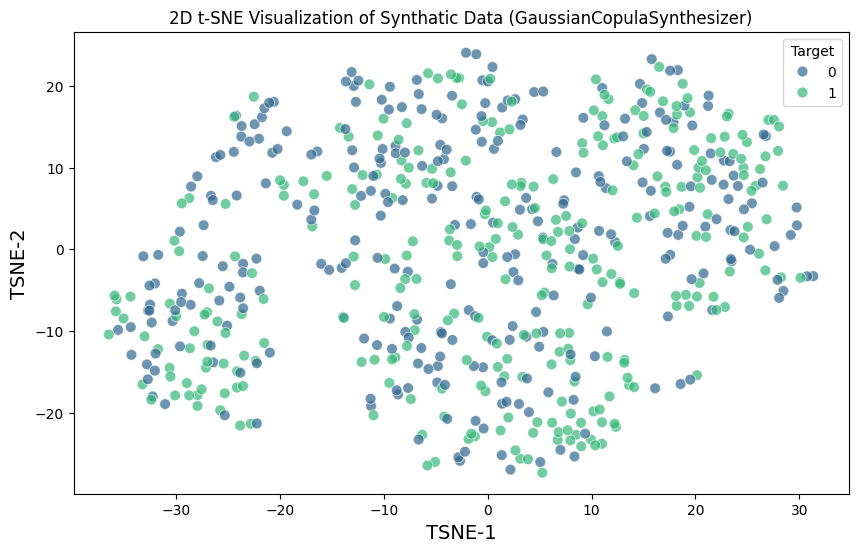

In [143]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2'])
tsne_df['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE-1', y='TSNE-2', hue='target', palette='viridis', s=60, alpha=0.7)
plt.title('2D t-SNE Visualization of Synthatic Data (GaussianCopulaSynthesizer)', fontsize=12)
plt.xlabel('TSNE-1', fontsize=14)
plt.ylabel('TSNE-2', fontsize=14)
plt.legend(title='Target', loc='best')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



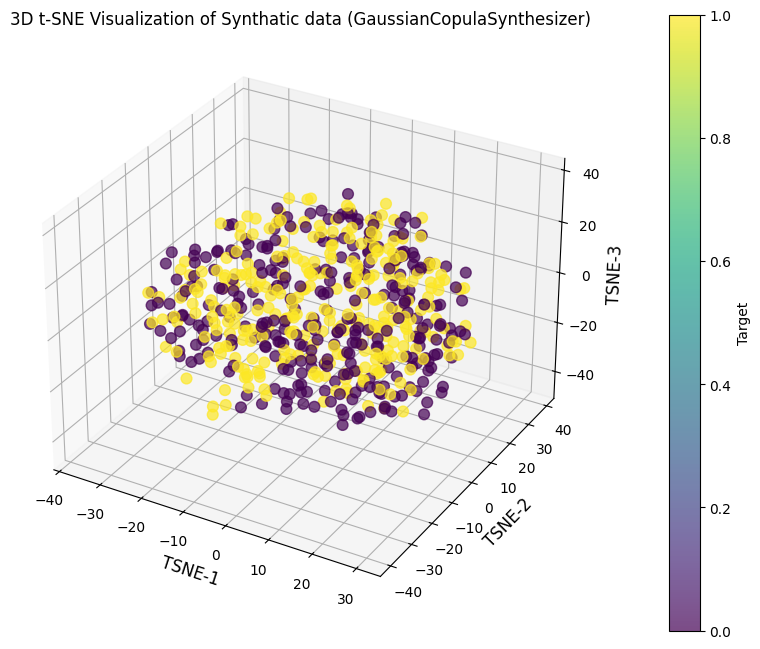

In [144]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=3, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2', 'TSNE-3'])
tsne_df['target'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    tsne_df['TSNE-1'], tsne_df['TSNE-2'], tsne_df['TSNE-3'],
    c=tsne_df['target'], cmap='viridis', s=60, alpha=0.7
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Target')

ax.set_title('3D t-SNE Visualization of Synthatic data (GaussianCopulaSynthesizer)', fontsize=12)
ax.set_xlabel('TSNE-1', fontsize=12)
ax.set_ylabel('TSNE-2', fontsize=12)
ax.set_zlabel('TSNE-3', fontsize=12)

plt.show()

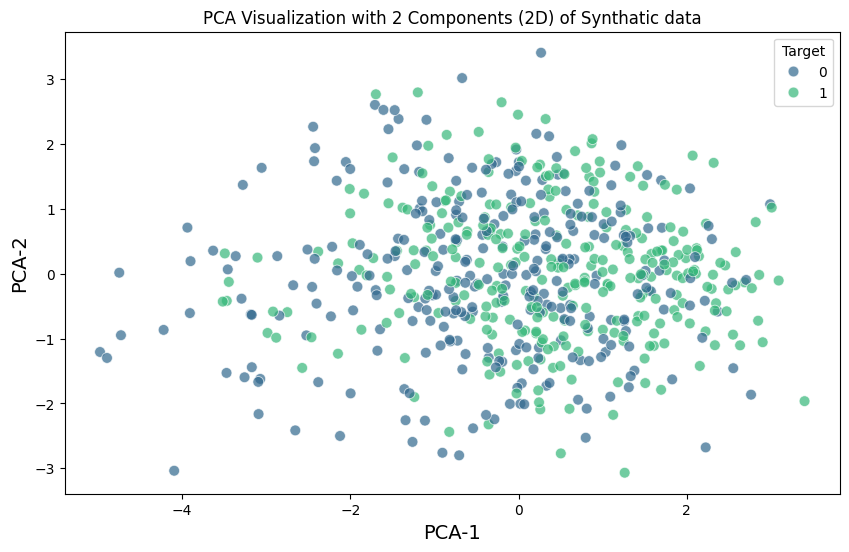

In [145]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA-1', 'PCA-2'])
pca_df['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA-1', y='PCA-2', hue='target', palette='viridis', s=60, alpha=0.7)
plt.title('PCA Visualization with 2 Components (2D) of Synthatic data', fontsize=12)
plt.xlabel('PCA-1', fontsize=14)
plt.ylabel('PCA-2', fontsize=14)
plt.legend(title='Target', loc='best')
plt.show()

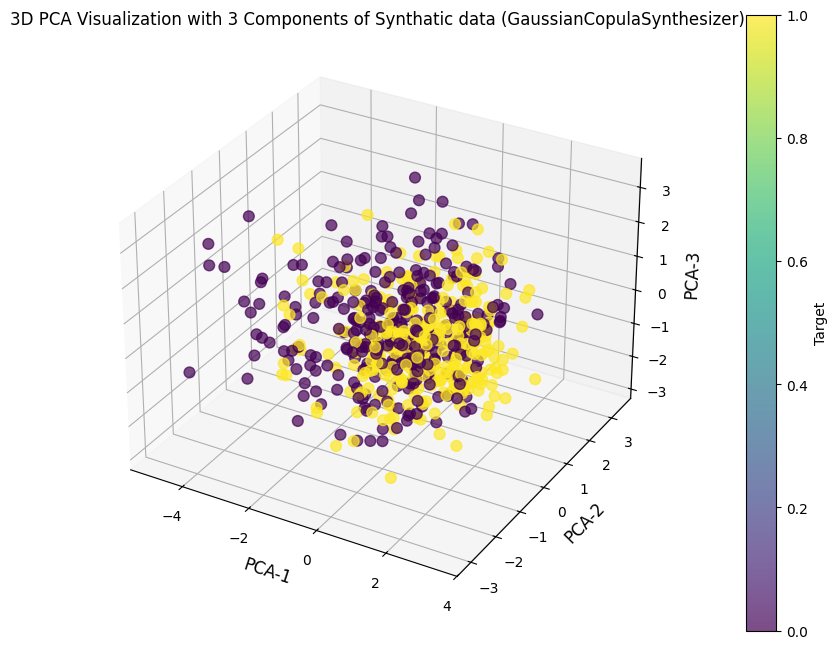

In [146]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA-1', 'PCA-2', 'PCA-3'])
pca_df['target'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df['PCA-1'], pca_df['PCA-2'], pca_df['PCA-3'],
    c=pca_df['target'], cmap='viridis', s=60, alpha=0.7
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Target')

ax.set_title('3D PCA Visualization with 3 Components of Synthatic data (GaussianCopulaSynthesizer)', fontsize=12)
ax.set_xlabel('PCA-1', fontsize=12)
ax.set_ylabel('PCA-2', fontsize=12)
ax.set_zlabel('PCA-3', fontsize=12)

plt.show()

In [147]:
scaler = MinMaxScaler()
synth_df_scaled = scaler.fit_transform(synthetic_data_GCS)
synth_df_scaled = pd.DataFrame(synth_df_scaled, columns=df.columns)

In [148]:
synth_train_data, synth_test_data = train_test_split(synth_df_scaled, test_size=0.25)

In [149]:
synth_X_train = synth_train_data.drop(columns=['target']).to_numpy()
synth_y_train = synth_train_data['target'].to_numpy()

synth_X_test = synth_test_data.drop(columns=['target']).to_numpy()
synth_y_test = synth_test_data['target'].to_numpy()

In [150]:
print("X_train: ", synth_X_train.shape)
print("y_train: ",synth_y_train.shape)
print("X_test: ",synth_X_test.shape)
print("y_test:",synth_y_test.shape)

X_train:  (450, 13)
y_train:  (450,)
X_test:  (150, 13)
y_test: (150,)


In [151]:
train_models_synthatic = eval_moduls(synth_X_train, synth_y_train, synth_X_test, synth_y_test, list_models)

SVM
{'model': <__main__.ClassifierModel object at 0x78a5068da050>, 'accuracy': 0.6266666666666667, 'f1_score': 0.6266666666666667, 'precision': 0.6268895211000474, 'recall': 0.6266666666666667, 'confusion_matrix': array([[47, 29],
       [27, 47]])}
------------------------------------------------------------------------------------------>
DecisionTree
{'model': <__main__.ClassifierModel object at 0x78a5062e0e10>, 'accuracy': 0.4866666666666667, 'f1_score': 0.48659821918011176, 'precision': 0.4869192907549072, 'recall': 0.4866666666666667, 'confusion_matrix': array([[36, 40],
       [37, 37]])}
------------------------------------------------------------------------------------------>
RandomForest
{'model': <__main__.ClassifierModel object at 0x78a50571a890>, 'accuracy': 0.54, 'f1_score': 0.5399386639406196, 'precision': 0.5403095534602383, 'recall': 0.54, 'confusion_matrix': array([[40, 36],
       [33, 41]])}
---------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [152]:
test_on_real_model={}
for key, item in train_models_synthatic.items():
  test_on_real_model[key] = test_model(y_test, X_test, item["model"])
  print(test_on_real_model[key])
  print("---"*30)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



{'model': 'SVM', 'accuracy': 0.4474708171206226, 'f1_score': 0.27666206434877205, 'precision': 0.20023013217459767, 'recall': 0.4474708171206226, 'confusion_matrix': array([[115,   0],
       [142,   0]])}
------------------------------------------------------------------------------------------
{'model': 'DecisionTree', 'accuracy': 0.2801556420233463, 'f1_score': 0.24770469779971183, 'precision': 0.25215207078513935, 'recall': 0.2801556420233463, 'confusion_matrix': array([[ 57,  58],
       [127,  15]])}
------------------------------------------------------------------------------------------
{'model': 'RandomForest', 'accuracy': 0.603112840466926, 'f1_score': 0.5689309274844215, 'precision': 0.7189683214102911, 'recall': 0.603112840466926, 'confusion_matrix': array([[108,   7],
       [ 95,  47]])}
------------------------------------------------------------------------------------------
{'model': 'LogisticRegression', 'accuracy': 0.5058365758754864, 'f1_score': 0.3938653455880357,

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### CTGAN

In [153]:
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(metadata)
synthesizer.fit(df)

In [154]:
synthetic_data_CTGANS = synthesizer.sample(num_rows=1000)

In [155]:
synthetic_data_CTGANS.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   51    1   0       103   253    0        0      140      0      1.3      1   
1   47    0   3       101   256    0        0      183      1      2.8      2   
2   39    1   2       108   235    0        0      125      1      1.7      2   
3   43    0   0       125   286    0        0      166      1      1.5      2   
4   36    1   0       160   376    0        0      126      0      1.6      2   
5   43    1   2       139   496    0        0       97      0      3.2      1   
6   43    1   2       175   202    0        1      175      0      0.1      1   
7   37    1   2       162   131    0        0      122      0      4.2      1   
8   56    1   1       158   221    0        0       98      0      0.1      1   
9   29    1   0       122   205    0        1      152      0      0.0      2   

   ca  thal  target  
0   0     2       0  
1   0     3       0  
2   0     3       0  
3   4     3       1  
4   0     2       0  
5   1     1       0  
6   3     2       1  
7   0     2       1  
8   1     3       0  
9   1     1       0

In [156]:
df_label0 = synthetic_data_CTGANS[synthetic_data_CTGANS['target'] == 0][:300]
df_label1 = synthetic_data_CTGANS[synthetic_data_CTGANS['target'] == 1][:300]

In [157]:
synthetic_data_CTGANS = pd.concat([df_label0, df_label1])
synthetic_data_CTGANS = synthetic_data_CTGANS.sample(frac=1).reset_index(drop=True)

In [158]:
jsd_all_columns(df, synthetic_data_CTGANS)

target      5.268356e-09
sex         2.135965e-03
exang       9.050790e-03
slope       1.512891e-02
cp          2.346372e-02
thal        3.034131e-02
fbs         4.032466e-02
restecg     6.338369e-02
ca          6.565515e-02
oldpeak     1.763783e-01
thalach     1.889787e-01
trestbps    2.107718e-01
chol        2.164215e-01
age         2.676162e-01
dtype: float64

In [159]:
ks_test_all_columns(df, synthetic_data_CTGANS)

KS_stat       p_value
age       0.279375  1.178446e-23
trestbps  0.195937  8.550813e-12
oldpeak   0.188854  5.515707e-11
chol      0.121927  7.934377e-05
thalach   0.105104  1.064521e-03
restecg   0.057708  2.020342e-01
fbs       0.042500  5.586097e-01
ca        0.040677  6.142535e-01
thal      0.023281  9.907125e-01
slope     0.014687  9.999986e-01
cp        0.013750  9.999998e-01
exang     0.012188  1.000000e+00
sex       0.002760  1.000000e+00
target    0.000000  1.000000e+00

In [160]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=df,
    synthetic_data=synthetic_data_CTGANS,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 14/14 [00:00<00:00, 461.39it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 173.14it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [161]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=df,
    synthetic_data=synthetic_data_CTGANS,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 14/14 [00:00<00:00, 374.58it/s]|
Column Shapes Score: 91.73%

(2/2) Evaluating Column Pair Trends: |██████████| 91/91 [00:00<00:00, 114.67it/s]|
Column Pair Trends Score: 81.55%

Overall Score (Average): 86.64%



In [162]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data_CTGANS,
    metadata=metadata,
    column_name='trestbps'
)

fig.show()

In [163]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data_CTGANS,
    metadata=metadata,
    column_name='chol'
)

fig.show()

In [164]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data_CTGANS,
    metadata=metadata,
    column_name='thalach'
)

fig.show()

In [165]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data_CTGANS,
    metadata=metadata,
    column_name='oldpeak'
)

fig.show()

In [166]:
X = synthetic_data_CTGANS.drop(columns=['target'])
y = synthetic_data_CTGANS['target']

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



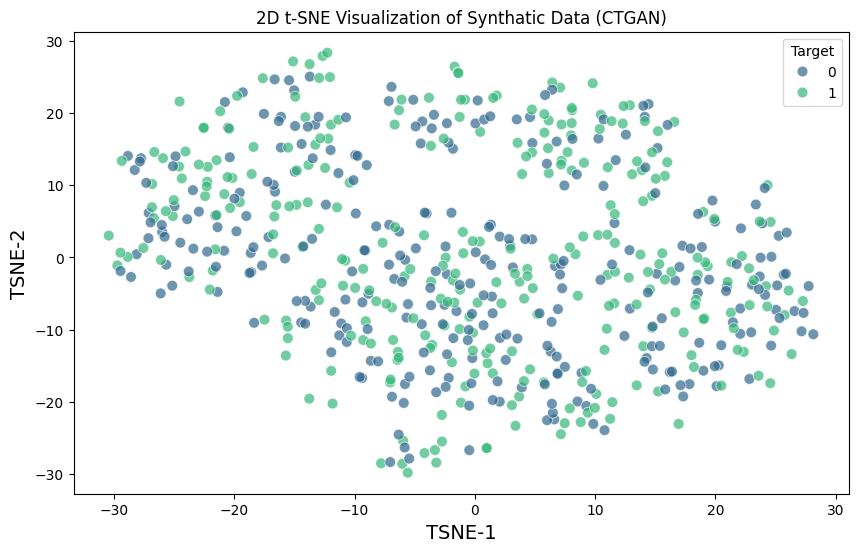

In [167]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2'])
tsne_df['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE-1', y='TSNE-2', hue='target', palette='viridis', s=60, alpha=0.7)
plt.title('2D t-SNE Visualization of Synthatic Data (CTGAN)', fontsize=12)
plt.xlabel('TSNE-1', fontsize=14)
plt.ylabel('TSNE-2', fontsize=14)
plt.legend(title='Target', loc='best')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



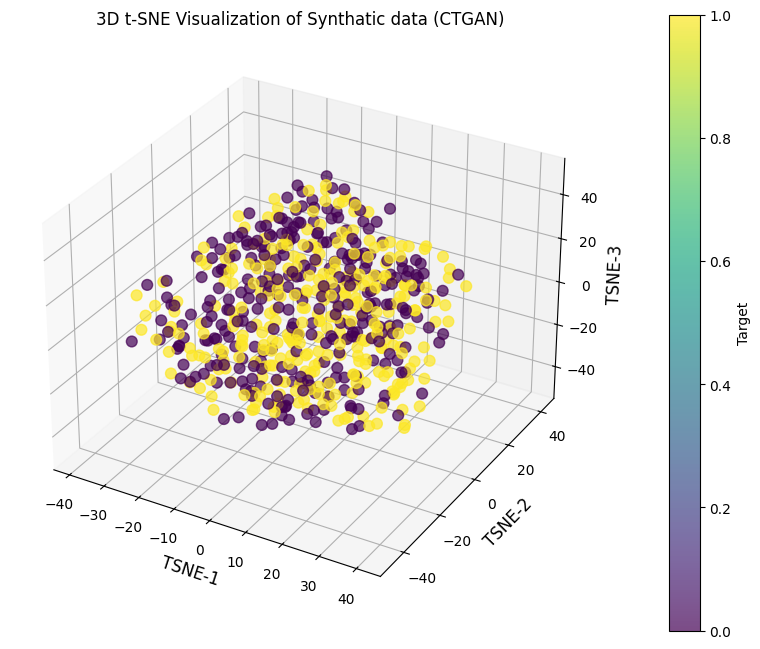

In [168]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=3, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2', 'TSNE-3'])
tsne_df['target'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    tsne_df['TSNE-1'], tsne_df['TSNE-2'], tsne_df['TSNE-3'],
    c=tsne_df['target'], cmap='viridis', s=60, alpha=0.7
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Target')

ax.set_title('3D t-SNE Visualization of Synthatic data (CTGAN)', fontsize=12)
ax.set_xlabel('TSNE-1', fontsize=12)
ax.set_ylabel('TSNE-2', fontsize=12)
ax.set_zlabel('TSNE-3', fontsize=12)

plt.show()

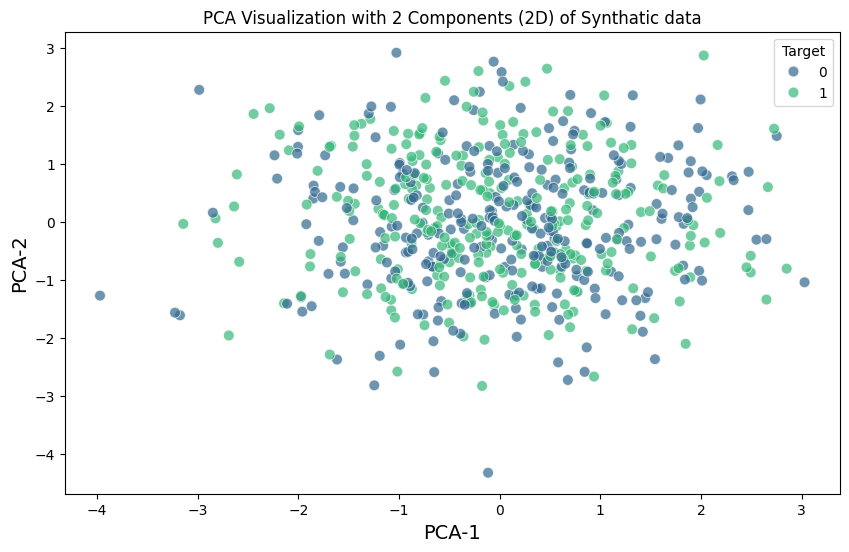

In [169]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA-1', 'PCA-2'])
pca_df['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA-1', y='PCA-2', hue='target', palette='viridis', s=60, alpha=0.7)
plt.title('PCA Visualization with 2 Components (2D) of Synthatic data', fontsize=12)
plt.xlabel('PCA-1', fontsize=14)
plt.ylabel('PCA-2', fontsize=14)
plt.legend(title='Target', loc='best')
plt.show()

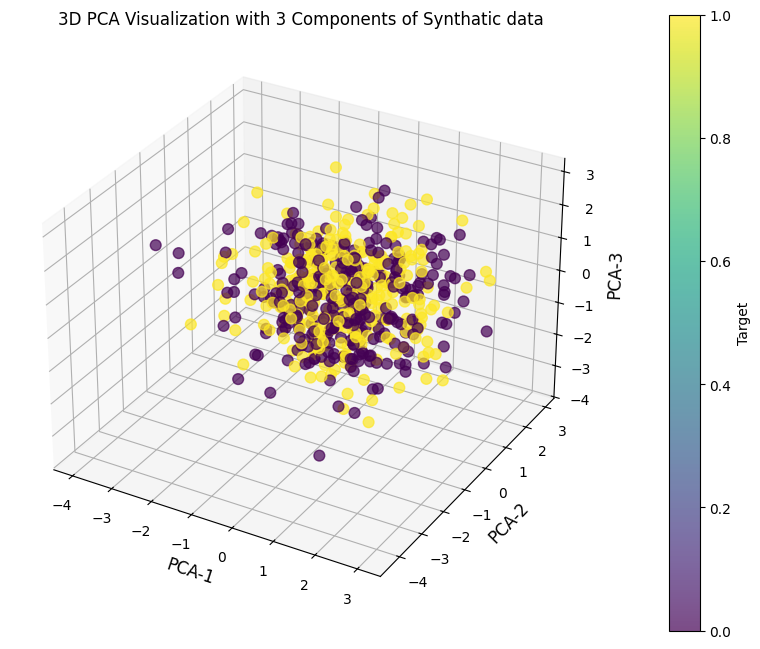

In [170]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA-1', 'PCA-2', 'PCA-3'])
pca_df['target'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df['PCA-1'], pca_df['PCA-2'], pca_df['PCA-3'],
    c=pca_df['target'], cmap='viridis', s=60, alpha=0.7
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Target')

ax.set_title('3D PCA Visualization with 3 Components of Synthatic data', fontsize=12)
ax.set_xlabel('PCA-1', fontsize=12)
ax.set_ylabel('PCA-2', fontsize=12)
ax.set_zlabel('PCA-3', fontsize=12)

plt.show()

In [171]:
scaler = MinMaxScaler()
synth_df_scaled = scaler.fit_transform(synthetic_data_CTGANS)
synth_df_scaled = pd.DataFrame(synth_df_scaled, columns=df.columns)

In [172]:
synth_train_data, synth_test_data = train_test_split(synth_df_scaled, test_size=0.25)

In [173]:
synth_X_train = synth_train_data.drop(columns=['target']).to_numpy()
synth_y_train = synth_train_data['target'].to_numpy()

synth_X_test = synth_test_data.drop(columns=['target']).to_numpy()
synth_y_test = synth_test_data['target'].to_numpy()

In [174]:
print("X_train: ", synth_X_train.shape)
print("y_train: ",synth_y_train.shape)
print("X_test: ",synth_X_test.shape)
print("y_test:",synth_y_test.shape)

X_train:  (450, 13)
y_train:  (450,)
X_test:  (150, 13)
y_test: (150,)


In [175]:
train_models_synthatic = eval_moduls(synth_X_train, synth_y_train, synth_X_test, synth_y_test, list_models)

SVM
{'model': <__main__.ClassifierModel object at 0x78a4fd2d0850>, 'accuracy': 0.5066666666666667, 'f1_score': 0.5031181442186656, 'precision': 0.5040762463343109, 'recall': 0.5066666666666667, 'confusion_matrix': array([[46, 32],
       [42, 30]])}
------------------------------------------------------------------------------------------>
DecisionTree
{'model': <__main__.ClassifierModel object at 0x78a4fd3a7a50>, 'accuracy': 0.5333333333333333, 'f1_score': 0.5334992887624467, 'precision': 0.5344238975817923, 'recall': 0.5333333333333333, 'confusion_matrix': array([[41, 37],
       [33, 39]])}
------------------------------------------------------------------------------------------>
RandomForest
{'model': <__main__.ClassifierModel object at 0x78a5065e8e50>, 'accuracy': 0.47333333333333333, 'f1_score': 0.4734505005561736, 'precision': 0.47360967799323966, 'recall': 0.47333333333333333, 'confusion_matrix': array([[38, 40],
       [39, 33]])}
---------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [176]:
test_on_real_model={}
for key, item in train_models_synthatic.items():
  test_on_real_model[key] = test_model(y_test, X_test, item["model"])
  print(test_on_real_model[key])
  print("---"*30)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



{'model': 'SVM', 'accuracy': 0.4474708171206226, 'f1_score': 0.27666206434877205, 'precision': 0.20023013217459767, 'recall': 0.4474708171206226, 'confusion_matrix': array([[115,   0],
       [142,   0]])}
------------------------------------------------------------------------------------------
{'model': 'DecisionTree', 'accuracy': 0.5486381322957199, 'f1_score': 0.4663120318762342, 'precision': 0.5237888428302744, 'recall': 0.5486381322957199, 'confusion_matrix': array([[ 14, 101],
       [ 15, 127]])}
------------------------------------------------------------------------------------------
{'model': 'RandomForest', 'accuracy': 0.28793774319066145, 'f1_score': 0.28580197710143285, 'precision': 0.2932866111390368, 'recall': 0.28793774319066145, 'confusion_matrix': array([[ 40,  75],
       [108,  34]])}
------------------------------------------------------------------------------------------
{'model': 'LogisticRegression', 'accuracy': 0.377431906614786, 'f1_score': 0.290263213229155

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



{'model': 'NaiveBayes', 'accuracy': 0.4474708171206226, 'f1_score': 0.27666206434877205, 'precision': 0.20023013217459767, 'recall': 0.4474708171206226, 'confusion_matrix': array([[115,   0],
       [142,   0]])}
------------------------------------------------------------------------------------------


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



{'model': 'GaussianProcess', 'accuracy': 0.4474708171206226, 'f1_score': 0.27666206434877205, 'precision': 0.20023013217459767, 'recall': 0.4474708171206226, 'confusion_matrix': array([[115,   0],
       [142,   0]])}
------------------------------------------------------------------------------------------
{'model': 'LDA', 'accuracy': 0.3735408560311284, 'f1_score': 0.28797927195533324, 'precision': 0.3113533590187287, 'recall': 0.3735408560311284, 'confusion_matrix': array([[ 87,  28],
       [133,   9]])}
------------------------------------------------------------------------------------------
{'model': 'QDA', 'accuracy': 0.5525291828793775, 'f1_score': 0.393278917137201, 'precision': 0.30528849793335255, 'recall': 0.5525291828793775, 'confusion_matrix': array([[  0, 115],
       [  0, 142]])}
------------------------------------------------------------------------------------------
{'model': 'MLP', 'accuracy': 0.4474708171206226, 'f1_score': 0.27666206434877205, 'precision': 0.200

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### TVAESynthesizer

In [177]:
from sdv.single_table import TVAESynthesizer

synthesizer = TVAESynthesizer(metadata)
synthesizer.fit(df)

In [178]:
synthetic_data_TVAE = synthesizer.sample(num_rows=1000)

In [179]:
synthetic_data_TVAE.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   61    0   2       167   237    0        0      151      0      1.1      1   
1   62    0   2       136   278    0        0      181      0      0.1      2   
2   61    0   0       117   318    0        0      175      0      0.0      2   
3   43    1   2       128   229    0        1      172      0      0.0      2   
4   61    1   0       118   222    0        0      113      0      2.3      2   
5   60    1   0       114   199    0        0      154      0      0.7      1   
6   61    1   0       129   238    0        0      162      0      1.0      1   
7   45    0   2       132   324    0        1      183      0      0.1      2   
8   69    1   0       106   247    0        0      123      1      2.3      1   
9   42    1   2        98   224    0        1      174      0      0.0      2   

   ca  thal  target  
0   0     2       1  
1   0     2       1  
2   0     2       0  
3   0     2       1  
4   2     3       0  
5   0     3       0  
6   0     3       0  
7   0     2       1  
8   2     3       0  
9   0     2       1

In [180]:
df_label0 = synthetic_data_TVAE[synthetic_data_TVAE['target'] == 0].dropna().iloc[:300]
df_label1 = synthetic_data_TVAE[synthetic_data_TVAE['target'] == 1].dropna().iloc[:300]

In [181]:
synthetic_data_TVAE = pd.concat([df_label0, df_label1])
synthetic_data_TVAE = synthetic_data_TVAE.sample(frac=1).reset_index(drop=True)

In [182]:
jsd_all_columns(df, synthetic_data_TVAE)

target      5.268356e-09
exang       3.892519e-02
sex         6.543943e-02
restecg     6.785475e-02
thal        1.264531e-01
thalach     1.349747e-01
age         1.464951e-01
slope       1.492866e-01
ca          1.553438e-01
cp          1.606809e-01
oldpeak     1.635543e-01
chol        1.646231e-01
fbs         2.155452e-01
trestbps    2.575269e-01
dtype: float64

In [183]:
ks_test_all_columns(df, synthetic_data_TVAE)

KS_stat       p_value
trestbps  0.331562  2.620934e-33
chol      0.169375  6.476104e-09
ca        0.167344  1.032659e-08
fbs       0.142500  1.959132e-06
thalach   0.122135  7.664723e-05
oldpeak   0.088646  9.298054e-03
sex       0.080573  2.353309e-02
cp        0.071302  6.130267e-02
slope     0.069948  6.982004e-02
age       0.066562  9.561015e-02
thal      0.062344  1.384054e-01
exang     0.051146  3.276287e-01
restecg   0.013021  1.000000e+00
target    0.000000  1.000000e+00

In [184]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=df,
    synthetic_data=synthetic_data_TVAE,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 14/14 [00:00<00:00, 976.96it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 69.87it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [185]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=df,
    synthetic_data=synthetic_data_TVAE,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 14/14 [00:00<00:00, 464.34it/s]|
Column Shapes Score: 89.16%

(2/2) Evaluating Column Pair Trends: |██████████| 91/91 [00:00<00:00, 98.44it/s]| 
Column Pair Trends Score: 78.33%

Overall Score (Average): 83.75%



In [186]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data_TVAE,
    metadata=metadata,
    column_name='trestbps'
)

fig.show()

In [187]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data_TVAE,
    metadata=metadata,
    column_name='chol'
)

fig.show()

In [188]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data_TVAE,
    metadata=metadata,
    column_name='thalach'
)

fig.show()

In [189]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data_TVAE,
    metadata=metadata,
    column_name='oldpeak'
)

fig.show()

In [190]:
X = synthetic_data_TVAE.drop(columns=['target'])
y = synthetic_data_TVAE['target']

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



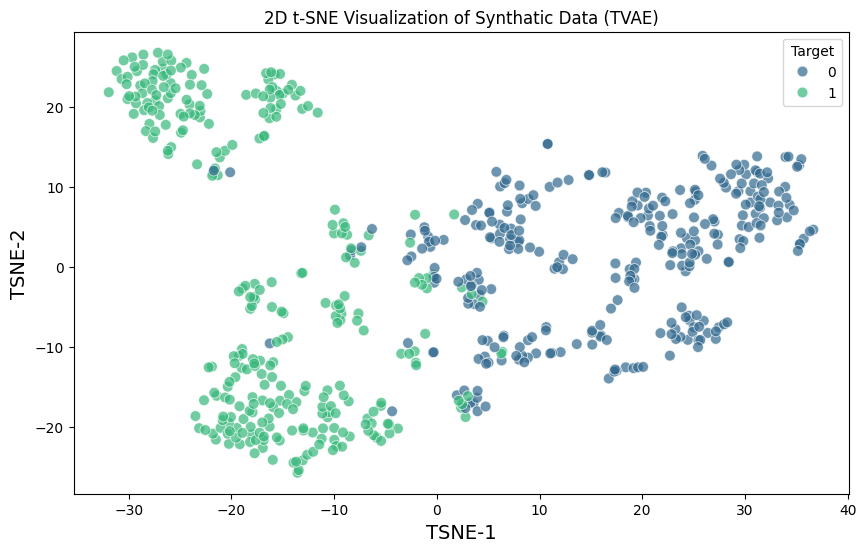

In [191]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2'])
tsne_df['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE-1', y='TSNE-2', hue='target', palette='viridis', s=60, alpha=0.7)
plt.title('2D t-SNE Visualization of Synthatic Data (TVAE)', fontsize=12)
plt.xlabel('TSNE-1', fontsize=14)
plt.ylabel('TSNE-2', fontsize=14)
plt.legend(title='Target', loc='best')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



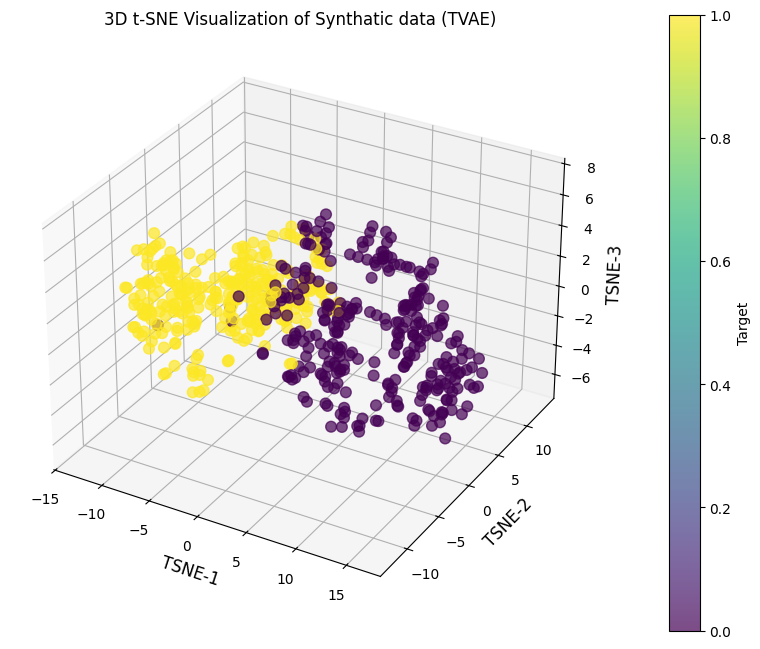

In [192]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=3, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2', 'TSNE-3'])
tsne_df['target'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    tsne_df['TSNE-1'], tsne_df['TSNE-2'], tsne_df['TSNE-3'],
    c=tsne_df['target'], cmap='viridis', s=60, alpha=0.7
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Target')

ax.set_title('3D t-SNE Visualization of Synthatic data (TVAE)', fontsize=12)
ax.set_xlabel('TSNE-1', fontsize=12)
ax.set_ylabel('TSNE-2', fontsize=12)
ax.set_zlabel('TSNE-3', fontsize=12)

plt.show()

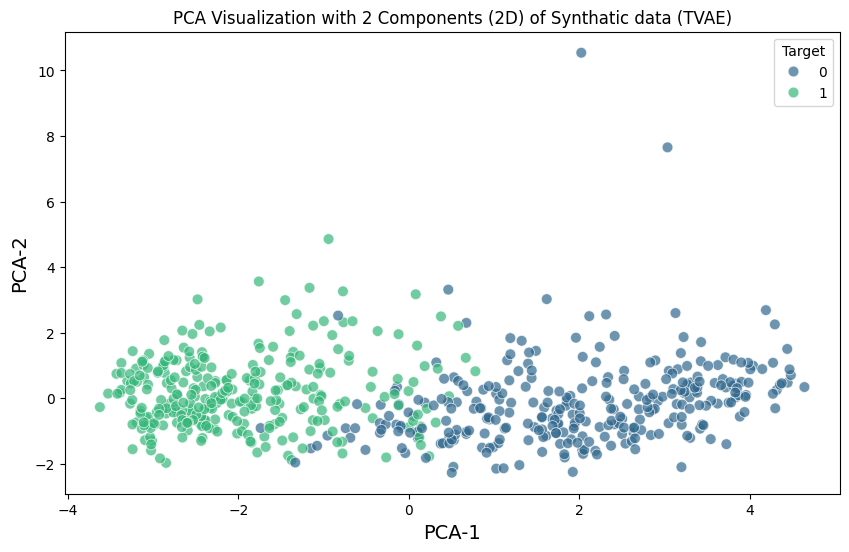

In [193]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA-1', 'PCA-2'])
pca_df['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA-1', y='PCA-2', hue='target', palette='viridis', s=60, alpha=0.7)
plt.title('PCA Visualization with 2 Components (2D) of Synthatic data (TVAE)', fontsize=12)
plt.xlabel('PCA-1', fontsize=14)
plt.ylabel('PCA-2', fontsize=14)
plt.legend(title='Target', loc='best')
plt.show()

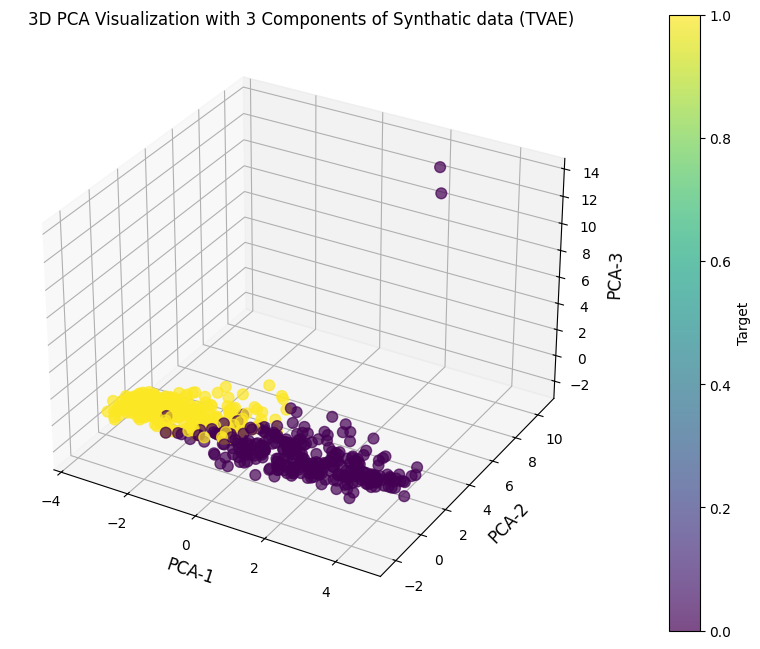

In [194]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA-1', 'PCA-2', 'PCA-3'])
pca_df['target'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df['PCA-1'], pca_df['PCA-2'], pca_df['PCA-3'],
    c=pca_df['target'], cmap='viridis', s=60, alpha=0.7
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Target')

ax.set_title('3D PCA Visualization with 3 Components of Synthatic data (TVAE)', fontsize=12)
ax.set_xlabel('PCA-1', fontsize=12)
ax.set_ylabel('PCA-2', fontsize=12)
ax.set_zlabel('PCA-3', fontsize=12)

plt.show()

In [195]:
scaler = MinMaxScaler()
synth_df_scaled = scaler.fit_transform(synthetic_data_TVAE)
synth_df_scaled = pd.DataFrame(synth_df_scaled, columns=df.columns)

In [196]:
synth_train_data, synth_test_data = train_test_split(synth_df_scaled, test_size=0.25)

In [197]:
synth_X_train = synth_train_data.drop(columns=['target']).to_numpy()
synth_y_train = synth_train_data['target'].to_numpy()

synth_X_test = synth_test_data.drop(columns=['target']).to_numpy()
synth_y_test = synth_test_data['target'].to_numpy()

In [198]:
print("X_train: ", synth_X_train.shape)
print("y_train: ",synth_y_train.shape)
print("X_test: ",synth_X_test.shape)
print("y_test:",synth_y_test.shape)

X_train:  (450, 13)
y_train:  (450,)
X_test:  (150, 13)
y_test: (150,)


In [199]:
train_models_synthatic = eval_moduls(synth_X_train, synth_y_train, synth_X_test, synth_y_test, list_models)

SVM
{'model': <__main__.ClassifierModel object at 0x78a5068d8690>, 'accuracy': 0.9466666666666667, 'f1_score': 0.9466761498340445, 'precision': 0.9470222222222223, 'recall': 0.9466666666666667, 'confusion_matrix': array([[70,  3],
       [ 5, 72]])}
------------------------------------------------------------------------------------------>
DecisionTree
{'model': <__main__.ClassifierModel object at 0x78a5063f31d0>, 'accuracy': 0.9, 'f1_score': 0.8999777767900796, 'precision': 0.9019586894586896, 'recall': 0.9, 'confusion_matrix': array([[68,  5],
       [10, 67]])}
------------------------------------------------------------------------------------------>
RandomForest
{'model': <__main__.ClassifierModel object at 0x78a5066c54d0>, 'accuracy': 0.9666666666666667, 'f1_score': 0.9666711128896003, 'precision': 0.9667614983404457, 'recall': 0.9666666666666667, 'confusion_matrix': array([[71,  2],
       [ 3, 74]])}
------------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning:

The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.



{'model': <__main__.ClassifierModel object at 0x78a5064aff10>, 'accuracy': 0.96, 'f1_score': 0.96, 'precision': 0.96, 'recall': 0.96, 'confusion_matrix': array([[70,  3],
       [ 3, 74]])}
------------------------------------------------------------------------------------------>


/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [200]:
test_on_real_model={}
for key, item in train_models_synthatic.items():
  test_on_real_model[key] = test_model(y_test, X_test, item["model"])
  print(test_on_real_model[key])
  print("---"*30)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



{'model': 'SVM', 'accuracy': 0.4474708171206226, 'f1_score': 0.27666206434877205, 'precision': 0.20023013217459767, 'recall': 0.4474708171206226, 'confusion_matrix': array([[115,   0],
       [142,   0]])}
------------------------------------------------------------------------------------------
{'model': 'DecisionTree', 'accuracy': 0.4474708171206226, 'f1_score': 0.27666206434877205, 'precision': 0.20023013217459767, 'recall': 0.4474708171206226, 'confusion_matrix': array([[115,   0],
       [142,   0]])}
------------------------------------------------------------------------------------------
{'model': 'RandomForest', 'accuracy': 0.6381322957198443, 'f1_score': 0.6060322074276187, 'precision': 0.779542761969335, 'recall': 0.6381322957198443, 'confusion_matrix': array([[113,   2],
       [ 91,  51]])}
------------------------------------------------------------------------------------------
{'model': 'LogisticRegression', 'accuracy': 0.4474708171206226, 'f1_score': 0.2766620643487720

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



{'model': 'GaussianProcess', 'accuracy': 0.4474708171206226, 'f1_score': 0.27666206434877205, 'precision': 0.20023013217459767, 'recall': 0.4474708171206226, 'confusion_matrix': array([[115,   0],
       [142,   0]])}
------------------------------------------------------------------------------------------
{'model': 'LDA', 'accuracy': 0.4474708171206226, 'f1_score': 0.27666206434877205, 'precision': 0.20023013217459767, 'recall': 0.4474708171206226, 'confusion_matrix': array([[115,   0],
       [142,   0]])}
------------------------------------------------------------------------------------------
{'model': 'QDA', 'accuracy': 0.4474708171206226, 'f1_score': 0.27666206434877205, 'precision': 0.20023013217459767, 'recall': 0.4474708171206226, 'confusion_matrix': array([[115,   0],
       [142,   0]])}
------------------------------------------------------------------------------------------
{'model': 'MLP', 'accuracy': 0.4708171206225681, 'f1_score': 0.325997171503327, 'precision': 0.75

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



### CopulaGANSynthesizer

In [201]:
from sdv.single_table import CopulaGANSynthesizer

synthesizer = CopulaGANSynthesizer(metadata)
synthesizer.fit(df)

In [202]:
synthetic_data_CopulaGANS = synthesizer.sample(num_rows=1000)

In [203]:
synthetic_data_CopulaGANS.head(10)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   60    1   0       131   231    0        0      186      0      0.4      1   
1   54    0   3       145   168    0        0      132      1      0.0      2   
2   57    1   2       137   250    0        1      190      1      1.3      2   
3   47    1   0       131   126    0        0      164      1      0.8      0   
4   39    1   0       163   306    0        0      106      0      1.3      2   
5   45    1   2       135   259    0        1      193      0      0.0      2   
6   46    1   2       121   270    0        1      141      0      0.0      1   
7   49    1   2       109   187    0        0      157      0      1.2      1   
8   34    1   1       114   176    0        0      172      0      0.0      2   
9   62    1   0       119   166    0        1      124      0      0.0      2   

   ca  thal  target  
0   0     3       0  
1   0     3       1  
2   0     3       0  
3   2     2       1  
4   1     3       0  
5   1     1       0  
6   3     1       1  
7   0     3       1  
8   1     3       1  
9   1     3       0

In [204]:
df_label0 = synthetic_data_CopulaGANS[synthetic_data_CopulaGANS['target'] == 0].dropna().iloc[:300]
df_label1 = synthetic_data_CopulaGANS[synthetic_data_CopulaGANS['target'] == 1].dropna().iloc[:300]

In [205]:
synthetic_data_CopulaGANS = pd.concat([df_label0, df_label1])
synthetic_data_CopulaGANS = synthetic_data_CopulaGANS.sample(frac=1).reset_index(drop=True)

In [206]:
jsd_all_columns(df, synthetic_data_CopulaGANS)

target      5.268356e-09
exang       2.099507e-03
sex         1.997422e-02
slope       2.647266e-02
restecg     3.638312e-02
fbs         3.730575e-02
ca          3.858433e-02
cp          4.120113e-02
thal        1.030338e-01
trestbps    2.351607e-01
age         2.959138e-01
thalach     3.024738e-01
chol        3.044124e-01
oldpeak     3.254325e-01
dtype: float64

In [207]:
ks_test_all_columns(df, synthetic_data_CopulaGANS)

KS_stat       p_value
oldpeak   0.420677  5.629362e-54
chol      0.338438  1.034581e-34
thalach   0.324062  8.209565e-32
age       0.299375  3.797367e-27
trestbps  0.158646  7.138853e-08
thal      0.130052  1.971369e-05
cp        0.057969  1.979429e-01
fbs       0.039167  6.609707e-01
sex       0.026094  9.700304e-01
slope     0.024688  9.824279e-01
ca        0.022552  9.936506e-01
restecg   0.020625  9.981101e-01
exang     0.002812  1.000000e+00
target    0.000000  1.000000e+00

In [208]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic_report = run_diagnostic(
    real_data=df,
    synthetic_data=synthetic_data_CopulaGANS,
    metadata=metadata)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 14/14 [00:00<00:00, 1401.87it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 247.95it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [209]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data=df,
    synthetic_data=synthetic_data_CopulaGANS,
    metadata=metadata)


Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 14/14 [00:00<00:00, 532.46it/s]|
Column Shapes Score: 86.54%

(2/2) Evaluating Column Pair Trends: |██████████| 91/91 [00:00<00:00, 172.09it/s]|
Column Pair Trends Score: 78.05%

Overall Score (Average): 82.29%



In [210]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data_CopulaGANS,
    metadata=metadata,
    column_name='trestbps'
)

fig.show()

In [211]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data_CopulaGANS,
    metadata=metadata,
    column_name='chol'
)

fig.show()

In [212]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data_CopulaGANS,
    metadata=metadata,
    column_name='thalach'
)

fig.show()

In [213]:
fig = get_column_plot(
    real_data=df,
    synthetic_data=synthetic_data_CopulaGANS,
    metadata=metadata,
    column_name='oldpeak'
)

fig.show()

In [214]:
X = synthetic_data_CopulaGANS.drop(columns=['target'])
y = synthetic_data_CopulaGANS['target']

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



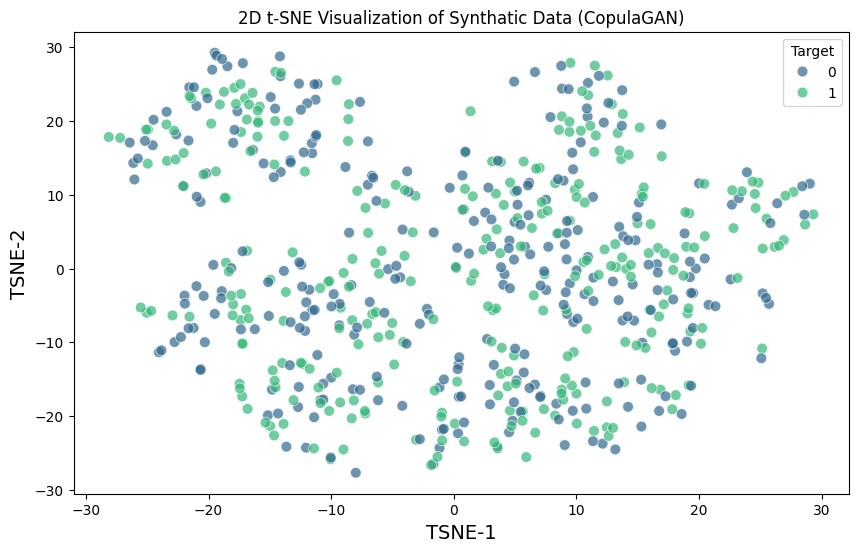

In [215]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2'])
tsne_df['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_df, x='TSNE-1', y='TSNE-2', hue='target', palette='viridis', s=60, alpha=0.7)
plt.title('2D t-SNE Visualization of Synthatic Data (CopulaGAN)', fontsize=12)
plt.xlabel('TSNE-1', fontsize=14)
plt.ylabel('TSNE-2', fontsize=14)
plt.legend(title='Target', loc='best')
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



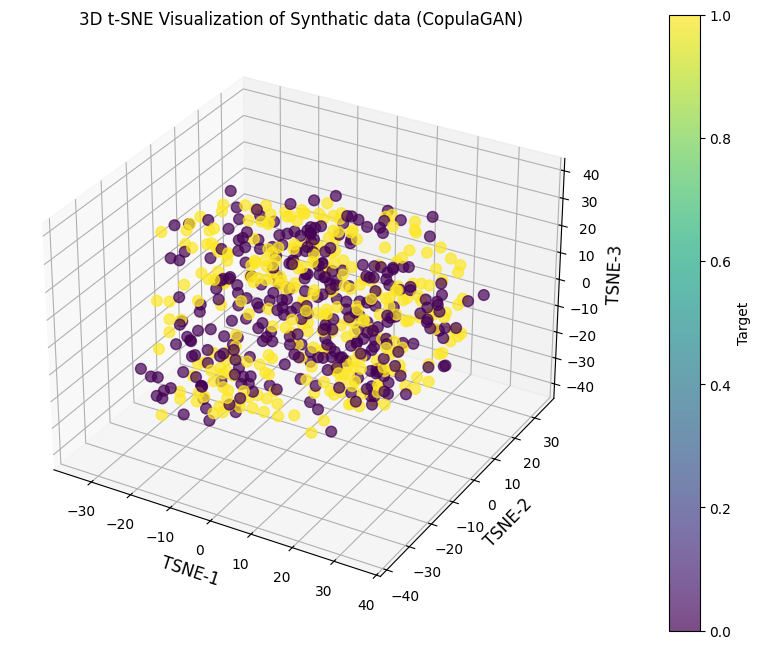

In [216]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(n_components=3, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['TSNE-1', 'TSNE-2', 'TSNE-3'])
tsne_df['target'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    tsne_df['TSNE-1'], tsne_df['TSNE-2'], tsne_df['TSNE-3'],
    c=tsne_df['target'], cmap='viridis', s=60, alpha=0.7
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Target')

ax.set_title('3D t-SNE Visualization of Synthatic data (CopulaGAN)', fontsize=12)
ax.set_xlabel('TSNE-1', fontsize=12)
ax.set_ylabel('TSNE-2', fontsize=12)
ax.set_zlabel('TSNE-3', fontsize=12)

plt.show()

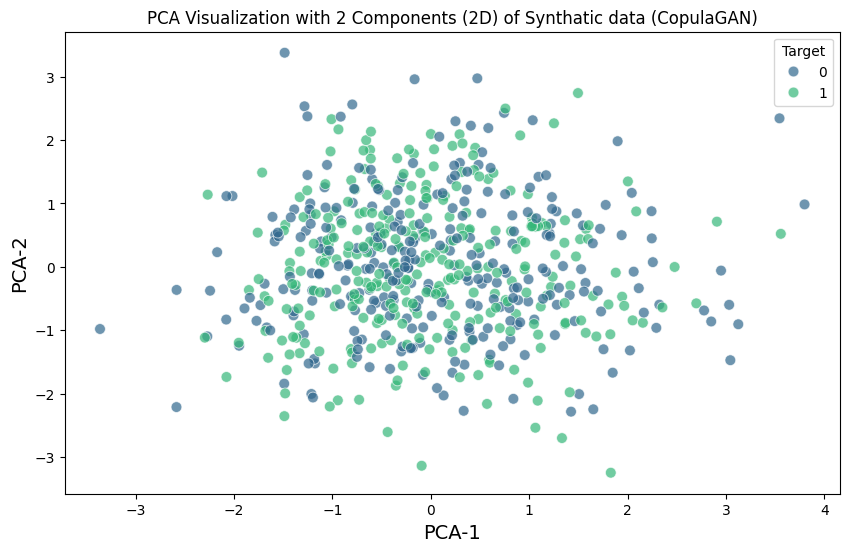

In [217]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA-1', 'PCA-2'])
pca_df['target'] = y

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA-1', y='PCA-2', hue='target', palette='viridis', s=60, alpha=0.7)
plt.title('PCA Visualization with 2 Components (2D) of Synthatic data (CopulaGAN)', fontsize=12)
plt.xlabel('PCA-1', fontsize=14)
plt.ylabel('PCA-2', fontsize=14)
plt.legend(title='Target', loc='best')
plt.show()

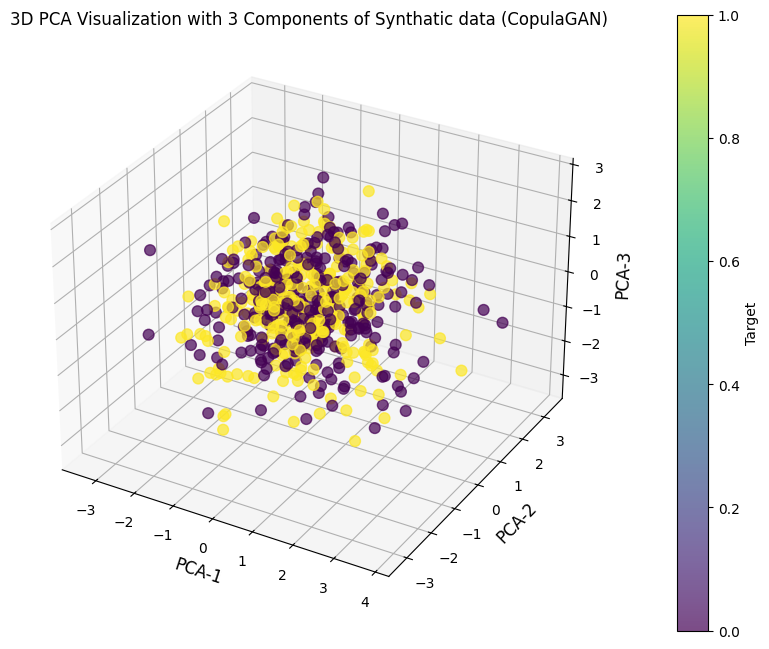

In [218]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(X_pca, columns=['PCA-1', 'PCA-2', 'PCA-3'])
pca_df['target'] = y

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    pca_df['PCA-1'], pca_df['PCA-2'], pca_df['PCA-3'],
    c=pca_df['target'], cmap='viridis', s=60, alpha=0.7
)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Target')

ax.set_title('3D PCA Visualization with 3 Components of Synthatic data (CopulaGAN)', fontsize=12)
ax.set_xlabel('PCA-1', fontsize=12)
ax.set_ylabel('PCA-2', fontsize=12)
ax.set_zlabel('PCA-3', fontsize=12)

plt.show()

In [219]:
scaler = MinMaxScaler()
synth_df_scaled = scaler.fit_transform(synthetic_data_CopulaGANS)
synth_df_scaled = pd.DataFrame(synth_df_scaled, columns=df.columns)

In [220]:
synth_train_data, synth_test_data = train_test_split(synth_df_scaled, test_size=0.25)

In [221]:
synth_X_train = synth_train_data.drop(columns=['target']).to_numpy()
synth_y_train = synth_train_data['target'].to_numpy()

synth_X_test = synth_test_data.drop(columns=['target']).to_numpy()
synth_y_test = synth_test_data['target'].to_numpy()

In [222]:
print("X_train: ", synth_X_train.shape)
print("y_train: ",synth_y_train.shape)
print("X_test: ",synth_X_test.shape)
print("y_test:",synth_y_test.shape)

X_train:  (450, 13)
y_train:  (450,)
X_test:  (150, 13)
y_test: (150,)


In [223]:
train_models_synthatic = eval_moduls(synth_X_train, synth_y_train, synth_X_test, synth_y_test, list_models)

SVM
{'model': <__main__.ClassifierModel object at 0x78a5060f1350>, 'accuracy': 0.52, 'f1_score': 0.5189730789802104, 'precision': 0.51961262553802, 'recall': 0.52, 'confusion_matrix': array([[35, 39],
       [33, 43]])}
------------------------------------------------------------------------------------------>
DecisionTree
{'model': <__main__.ClassifierModel object at 0x78a4fd1d1f50>, 'accuracy': 0.5266666666666666, 'f1_score': 0.5259295513533556, 'precision': 0.5274932903918411, 'recall': 0.5266666666666666, 'confusion_matrix': array([[42, 32],
       [39, 37]])}
------------------------------------------------------------------------------------------>
RandomForest
{'model': <__main__.ClassifierModel object at 0x78a4fd1eea50>, 'accuracy': 0.5533333333333333, 'f1_score': 0.553035436396781, 'precision': 0.5539692161407261, 'recall': 0.5533333333333333, 'confusion_matrix': array([[43, 31],
       [36, 40]])}
-------------------------------------------------------------------------------

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



In [224]:
test_on_real_model={}
for key, item in train_models_synthatic.items():
  test_on_real_model[key] = test_model(y_test, X_test, item["model"])
  print(test_on_real_model[key])
  print("---"*30)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



{'model': 'SVM', 'accuracy': 0.4474708171206226, 'f1_score': 0.27666206434877205, 'precision': 0.20023013217459767, 'recall': 0.4474708171206226, 'confusion_matrix': array([[115,   0],
       [142,   0]])}
------------------------------------------------------------------------------------------
{'model': 'DecisionTree', 'accuracy': 0.6653696498054474, 'f1_score': 0.6390788812506084, 'precision': 0.6881070814988905, 'recall': 0.6653696498054474, 'confusion_matrix': array([[ 44,  71],
       [ 15, 127]])}
------------------------------------------------------------------------------------------
{'model': 'RandomForest', 'accuracy': 0.44357976653696496, 'f1_score': 0.2749955425970403, 'precision': 0.19926434824902725, 'recall': 0.44357976653696496, 'confusion_matrix': array([[114,   1],
       [142,   0]])}
------------------------------------------------------------------------------------------
{'model': 'LogisticRegression', 'accuracy': 0.4474708171206226, 'f1_score': 0.27666206434877

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



{'model': 'ExtraTrees', 'accuracy': 0.5097276264591439, 'f1_score': 0.4933156332068971, 'precision': 0.5413484578689354, 'recall': 0.5097276264591439, 'confusion_matrix': array([[83, 32],
       [94, 48]])}
------------------------------------------------------------------------------------------
{'model': 'RidgeClassifier', 'accuracy': 0.4474708171206226, 'f1_score': 0.27666206434877205, 'precision': 0.20023013217459767, 'recall': 0.4474708171206226, 'confusion_matrix': array([[115,   0],
       [142,   0]])}
------------------------------------------------------------------------------------------
{'model': 'NaiveBayes', 'accuracy': 0.5252918287937743, 'f1_score': 0.5265899490966597, 'precision': 0.5301703719241021, 'recall': 0.5252918287937743, 'confusion_matrix': array([[60, 55],
       [67, 75]])}
------------------------------------------------------------------------------------------
{'model': 'GaussianProcess', 'accuracy': 0.4474708171206226, 'f1_score': 0.27666206434877205, '

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

